This project is


Aim of this Project
- Build machine learning that will help Elite bank to predict the custumers that will invest again so they can put more focus on that.
- Feature selection is selecting the relevant features.
- High specification- Ensure the model has high specification and minimize negative result.
- Model Explaination - to understand the model result.



Data Description
- Client's information
- Financial history
- Deposit label

Tech Stack
- Numpy
- panda
- matplotlib
- Seaburn
- Sci-kit Learn



In [1]:
!pip install mlflow

In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()   #set visualization

from scipy.io import arff
import gc

In [3]:
# Seed for reproducibility( all user have the same result)
SEED = np.random.seed(seed = 2023)

In [4]:
# Import the dataset
data_path = (r"C:\Users\abrah\Downloads\Bank_Marketing_Dataset (1).arff")
data_path

'C:\\Users\\abrah\\Downloads\\Bank_Marketing_Dataset (1).arff'

In [5]:
#convert all strings in the data to integer
def truncate_date(data):
  if data.isdigit():
    return int(data)
  else:
    if "." in data:
      try:
        return float(data)
      except:
        return data
  return data

def truncate_row(row):
  return [truncate_date(data) for data in row]

In [6]:
def read_data(data_path, num_lines=500000*4):
    with open(data_path, "r") as f:
        lines = f.readlines()



    ix = 0
    for (i, line) in enumerate(lines):
        if line.__contains__("@DATA"):
            ix = i
            break
    lines = lines[:num_lines+ix+1]

    header = [l.split(" ")[1] for l in lines[:ix] if l.startswith("@ATTRIBUTE")] #

    data = [truncate_row(l.replace("\n", "").strip().split(",")) for l in lines[ix+1:]]
    data = [l for l in data if len(l) == len(header)]

    return pd.DataFrame(data = data, columns = header)

In [7]:
data = read_data(data_path)
gc.collect()

0

In [8]:
data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
7,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
9,28,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  object
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  object
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(5), object(12)
memory usage: 1.4+ MB


In [10]:
#convert features to correct datatype

for column in data.select_dtypes(include = ["object"]).columns:
  try:
    data[column] = data[column].astype(int)
  except:
    pass



In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int32 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int32 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int32(2), int64(5), object(10)
memory usage: 1.4+ MB


In [12]:
data.nunique()

age            76
job            12
marital         3
education       4
default         2
balance      3805
housing         2
loan            2
contact         3
day            31
month          12
duration     1428
campaign       36
pdays         472
previous       34
poutcome        4
deposit         2
dtype: int64

In [13]:
#describe data
data.describe(include ='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
count,11162.000000,11162,11162,11162,11162,11162.000000,11162,11162,11162,11162.000000,11162,11162.000000,11162.000000,11162.000000,11162.000000,11162,11162
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,management,married,secondary,no,NaN,no,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,2566,6351,5476,10994,NaN,5881,9702,8042,NaN,2824,NaN,NaN,NaN,NaN,8326,5873
mean,41.231948,NaN,NaN,NaN,NaN,1528.538524,NaN,NaN,NaN,15.658036,NaN,371.993818,2.508421,51.330407,0.832557,NaN,NaN
std,11.913369,NaN,NaN,NaN,NaN,3225.413326,NaN,NaN,NaN,8.420740,NaN,347.128386,2.722077,108.758282,2.292007,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-6847.000000,NaN,NaN,NaN,1.000000,NaN,2.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,32.000000,NaN,NaN,NaN,NaN,122.000000,NaN,NaN,NaN,8.000000,NaN,138.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,550.000000,NaN,NaN,NaN,15.000000,NaN,255.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,49.000000,NaN,NaN,NaN,NaN,1708.000000,NaN,NaN,NaN,22.000000,NaN,496.000000,3.000000,20.750000,1.000000,NaN,NaN


In [14]:
#check missing value
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [15]:
#get duplicated record
num_duplicated = len(data.loc[data.duplicated()])
print("Number of duplicated records: ", num_duplicated)

Number of duplicated records:  0


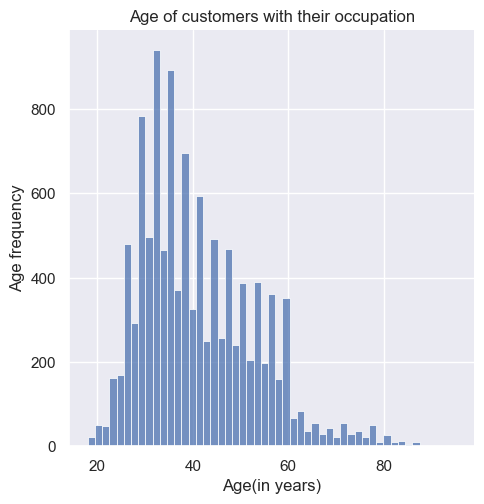

In [16]:
#distribution of age of customers
sns.displot(data = data, x = "age")
plt.title("Age of customers with their occupation")
plt.xlabel("Age(in years)")
plt.ylabel("Age frequency")
plt.show()

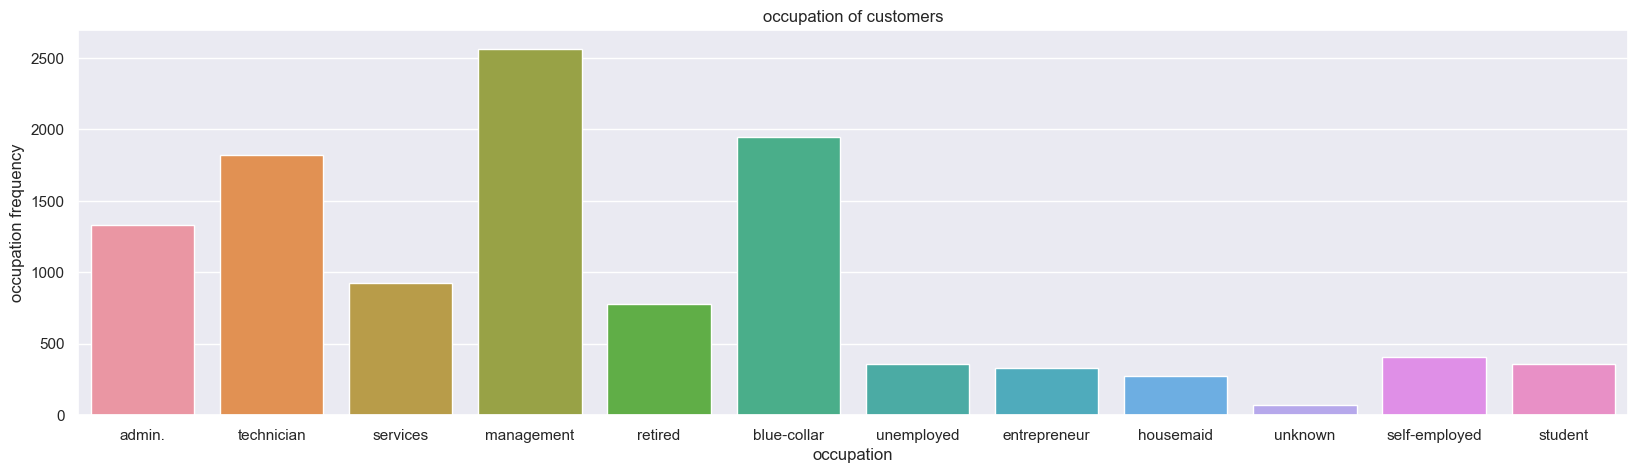

In [17]:
#distributio of customer occupation
plt.figure(figsize = (20, 5))
sns.countplot(data = data, x = "job")

plt.title("occupation of customers")
plt.xlabel("occupation")
plt.ylabel("occupation frequency")
plt.show()

In [18]:
#categorize the age to work
hue = data["age"].apply(lambda x: "working age" if x < 60 else "Retirement age")

age_job = data[['job']].copy()
age_job['hue'] = hue.values
age_job.head(10)


,job,hue
0,admin.,working age
1,admin.,working age
2,technician,working age
3,services,working age
4,admin.,working age
5,management,working age
6,management,working age
7,retired,Retirement age
8,technician,working age
9,services,working age


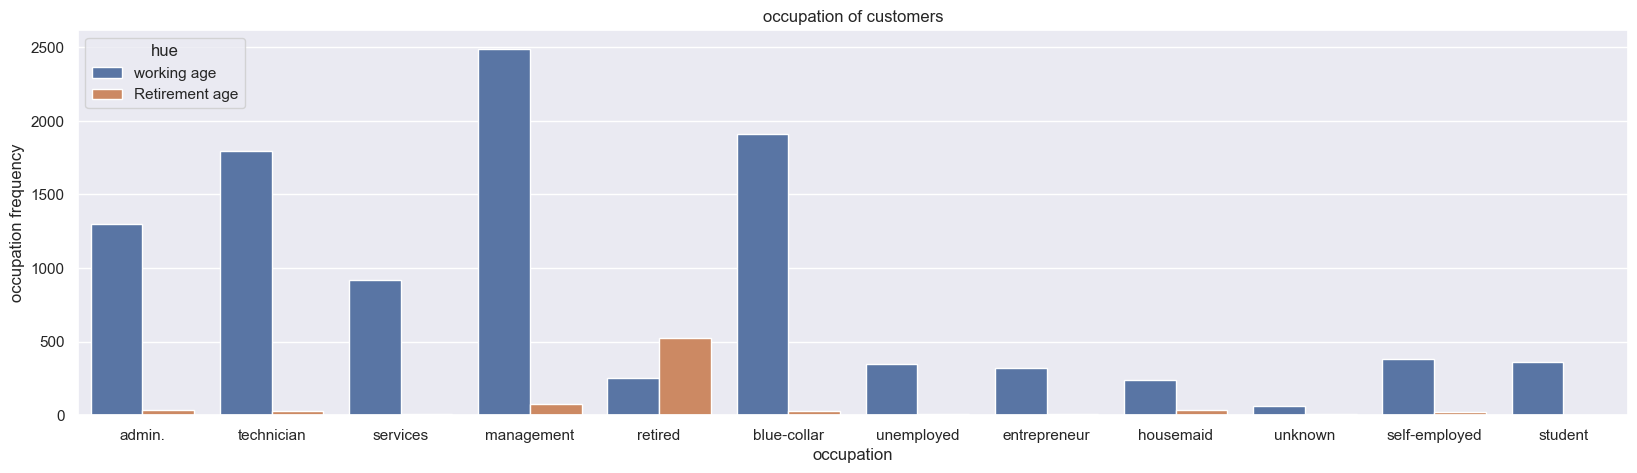

In [19]:
#visualize the distrubtion age of occupation
plt.figure(figsize = (20, 5))
sns.countplot(data = age_job, x = "job", hue = "hue")

plt.title("occupation of customers")
plt.xlabel("occupation")
plt.ylabel("occupation frequency")
plt.show()

Recommendation to Elite Bank
Looking at the insight of the visualization, Elit bank need to increase their data collection as there are some unknown job occupation which fall in the working age.

Data Analysis

1. comparison on types of debt
2. comparison between the type of debt
- Marital status
- Deposit decision

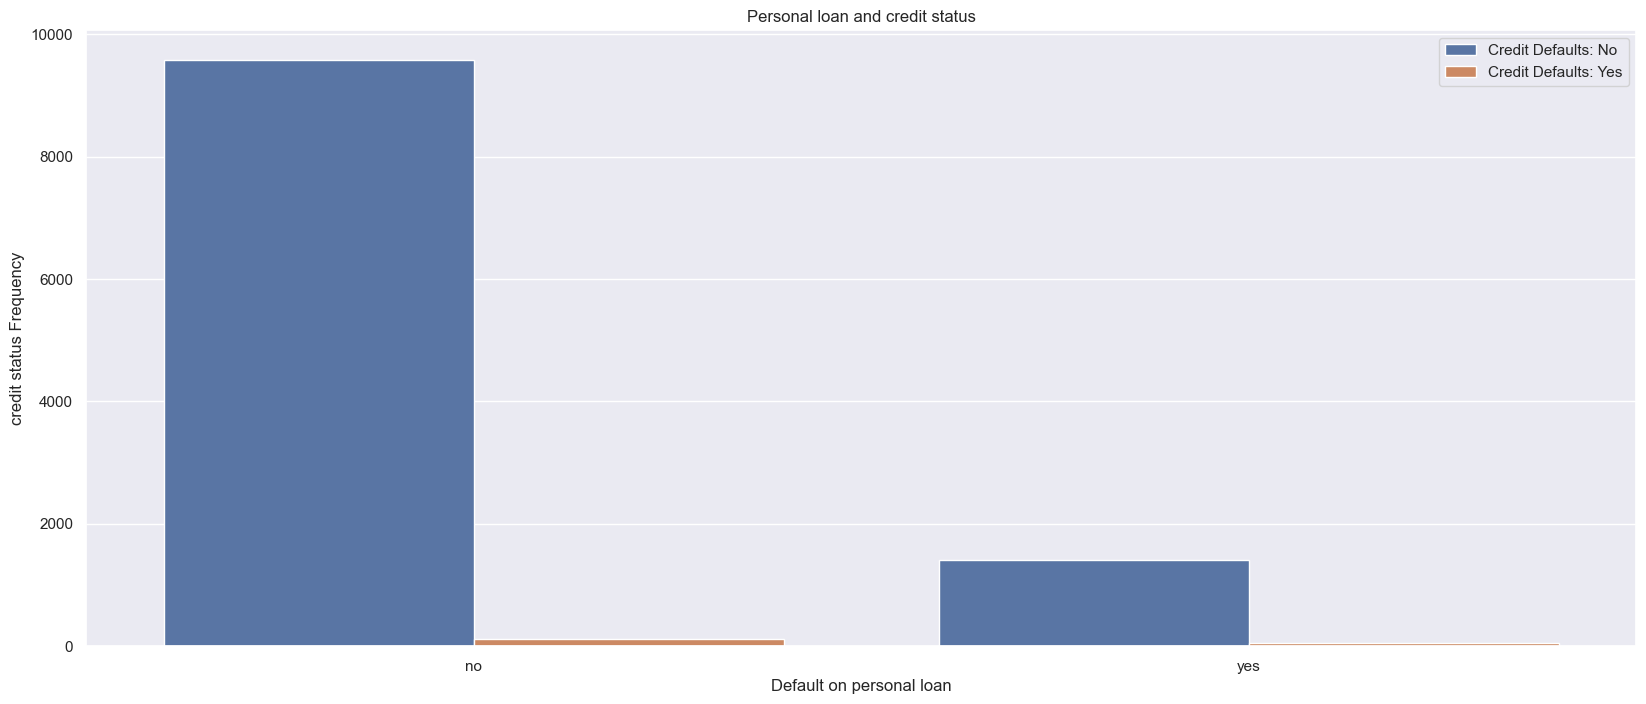

In [20]:
#visualize personal loan and credit status

plt.figure(figsize = (20, 8))

sns.countplot(data = data, x = 'loan', hue = 'default')

plt.title("Personal loan and credit status")
plt.xlabel("Default on personal loan")
plt.ylabel("credit status Frequency")
plt.legend(["Credit Defaults: No", "Credit Defaults: Yes"])
plt.show()

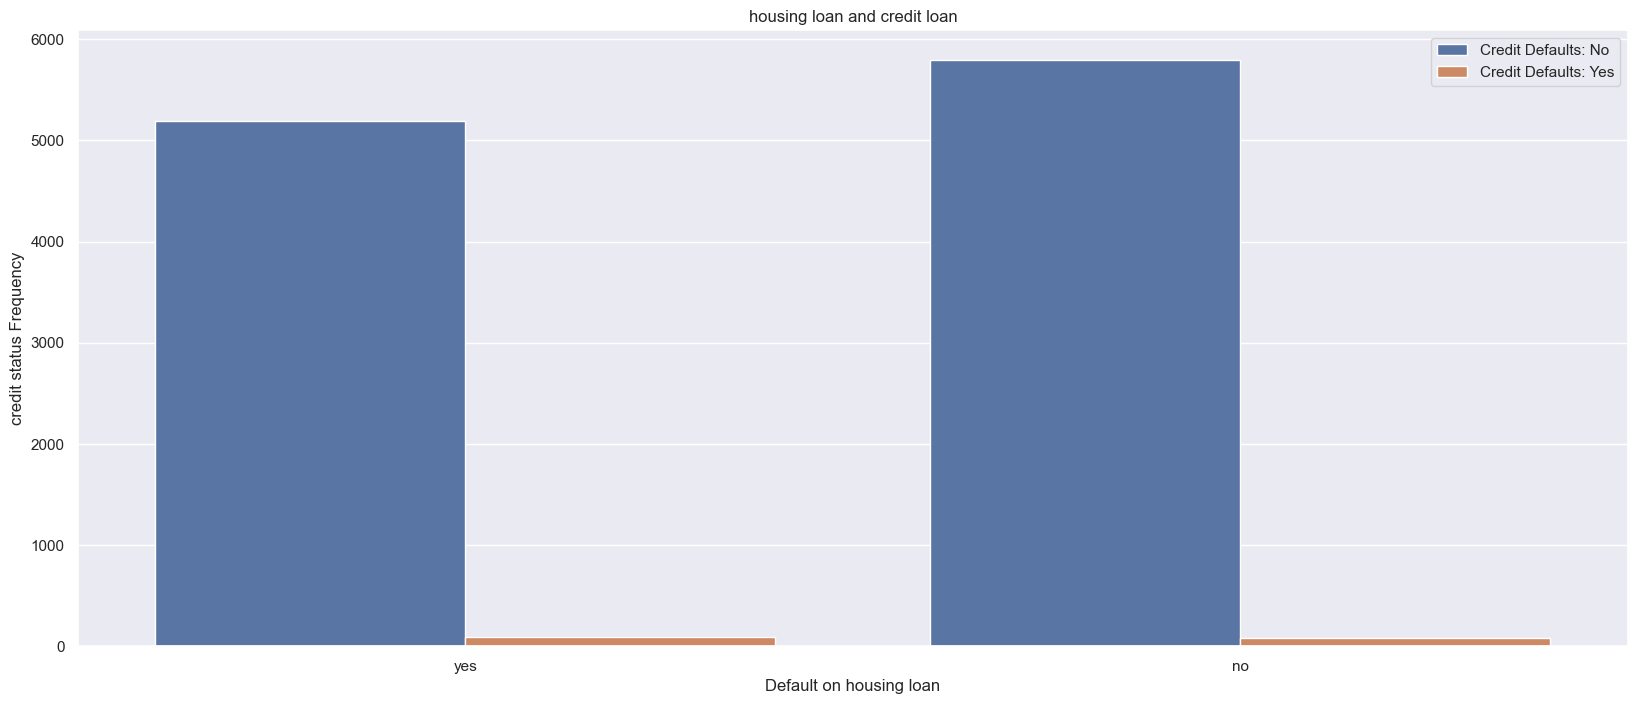

In [21]:
#visualize the housing loan and credit loan
plt.figure(figsize = (20, 8))

sns.countplot(data = data, x = 'housing', hue = 'default')

plt.title("housing loan and credit loan")
plt.xlabel("Default on housing loan")
plt.ylabel("credit status Frequency")
plt.legend(["Credit Defaults: No", "Credit Defaults: Yes"])
plt.show()

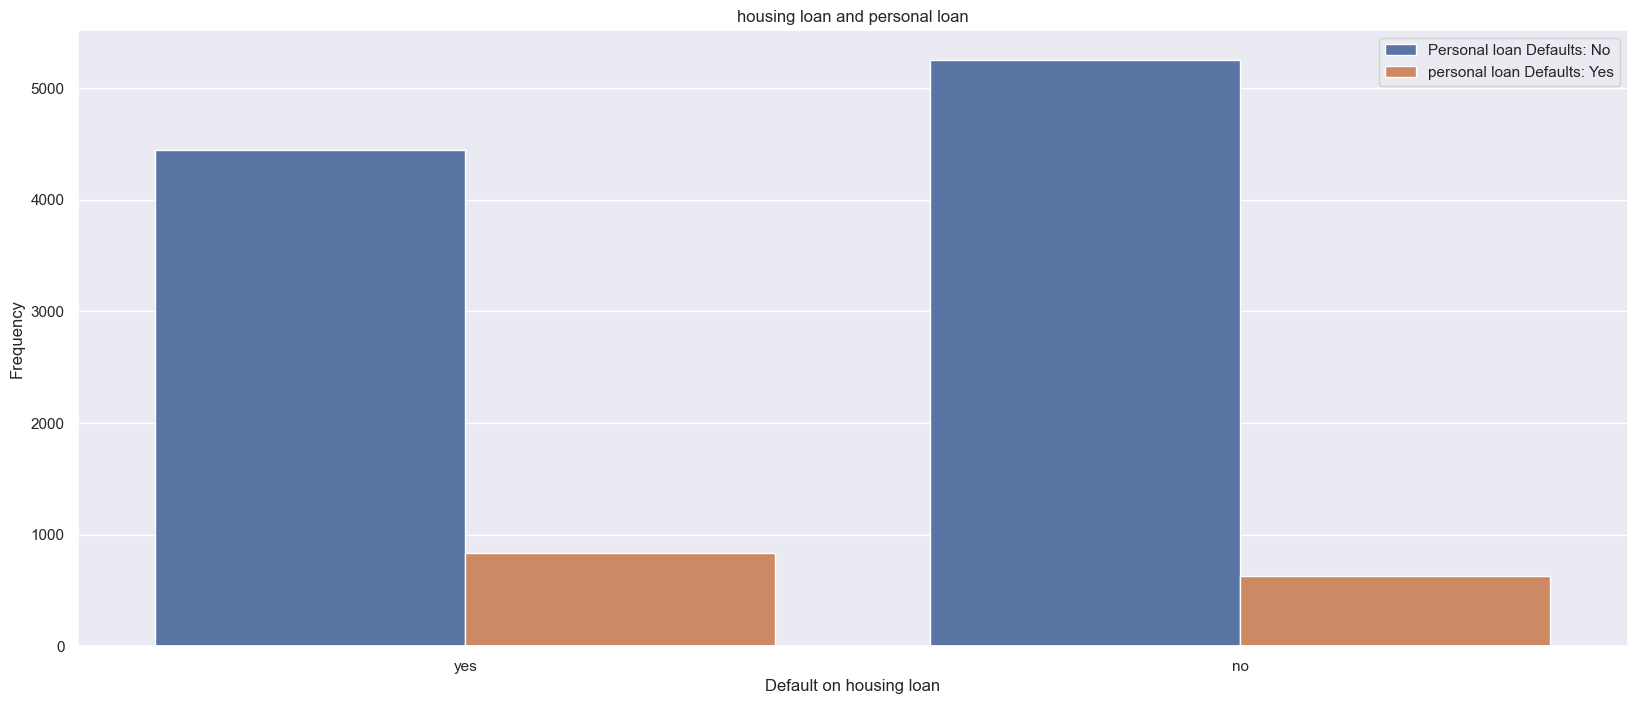

In [22]:
#visualize the housing loan and personal loan
plt.figure(figsize = (20, 8))

sns.countplot(data = data, x = 'housing', hue = 'loan')

plt.title("housing loan and personal loan")
plt.xlabel("Default on housing loan")
plt.ylabel("Frequency")
plt.legend(["Personal loan Defaults: No", "personal loan Defaults: Yes"])
plt.show()

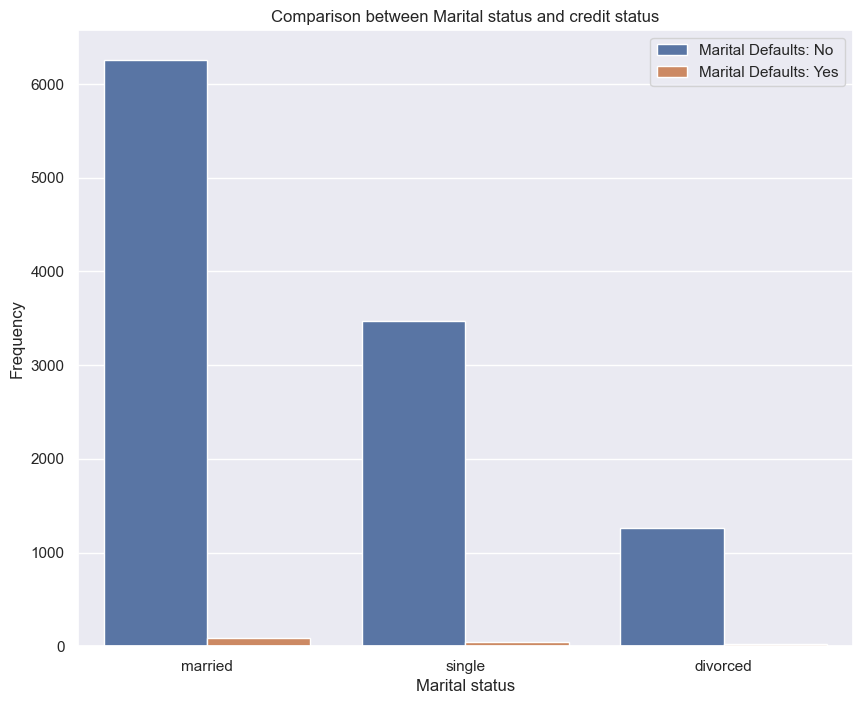

In [23]:
#comparison between marital status and credit status

plt.figure(figsize = (10, 8))

sns.countplot(data = data, x = 'marital', hue = 'default')
plt.title("Comparison between Marital status and credit status")
plt.xlabel("Marital status")
plt.ylabel("Frequency")
plt.legend(["Marital Defaults: No", "Marital Defaults: Yes"])
plt.show()

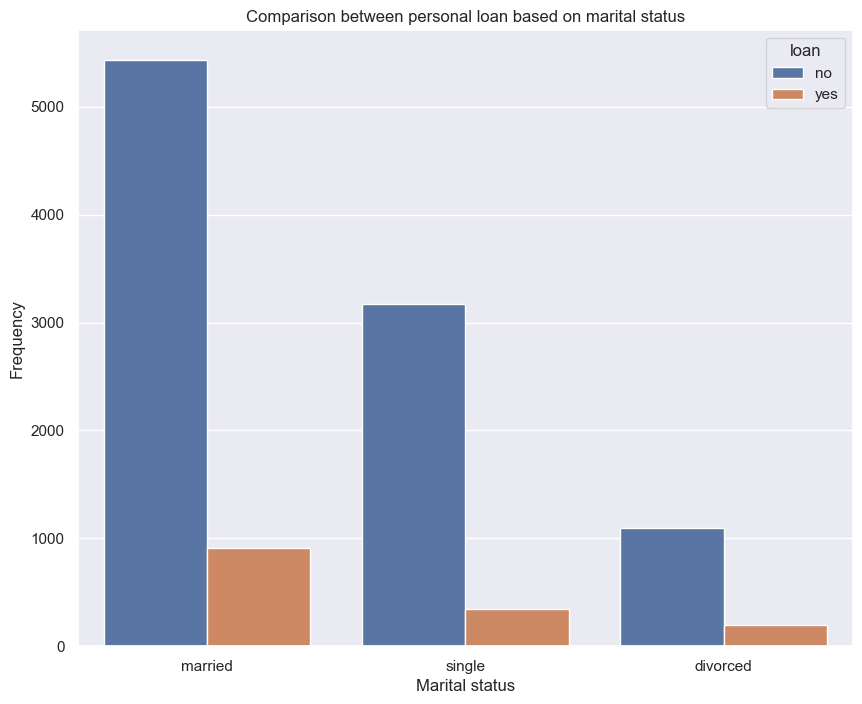

In [24]:
#comparison between personal loan based on marital status

plt.figure(figsize = (10, 8))

sns.countplot(data = data, x = 'marital', hue = 'loan')
plt.title("Comparison between personal loan based on marital status")
plt.xlabel("Marital status")
plt.ylabel("Frequency")
plt.show()

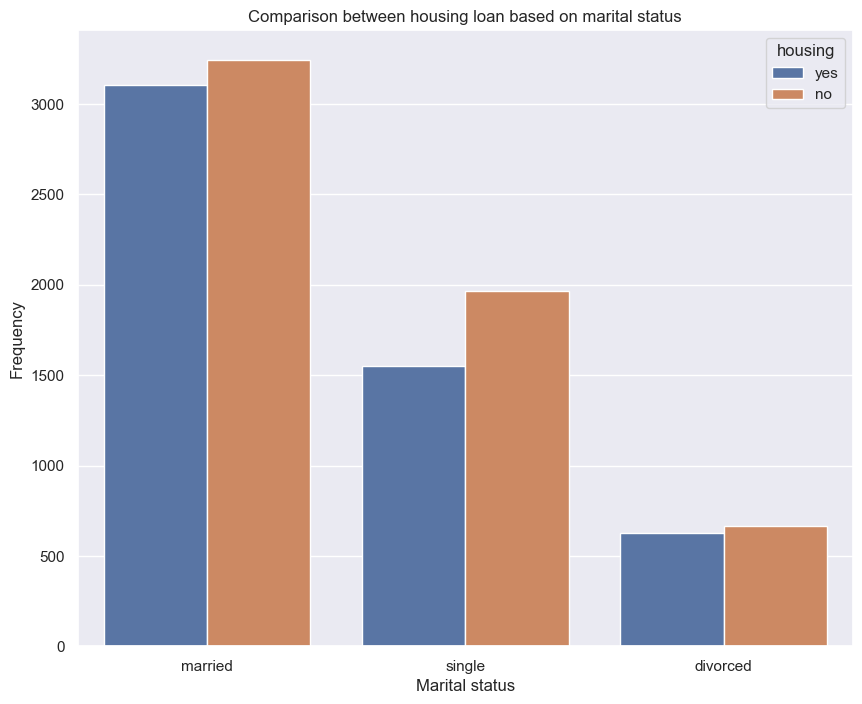

In [25]:
#comparison between housing loan based on marital status

plt.figure(figsize = (10, 8))

sns.countplot(data = data, x = 'marital', hue = 'housing')
plt.title("Comparison between housing loan based on marital status")
plt.xlabel("Marital status")
plt.ylabel("Frequency")
plt.show()

Looking at the visualization, it shows customers are finding it difficult to pay back their housing loan. We can recommend to Elite bank to make use of an icentives to attract more of their customers to pay bank their loans.

#Comparison between the deposit choices and credit default


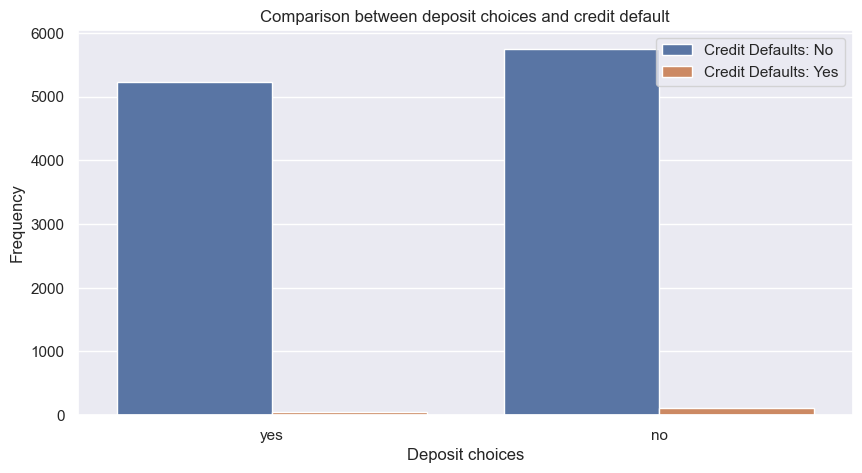

In [26]:
#compare deposit choices and credit default
plt.figure(figsize = (10, 5))

sns.countplot(data = data, x = 'deposit', hue = 'default')
plt.title("Comparison between deposit choices and credit default")
plt.xlabel("Deposit choices")
plt.ylabel("Frequency")
plt.legend(["Credit Defaults: No", "Credit Defaults: Yes"])
plt.show()

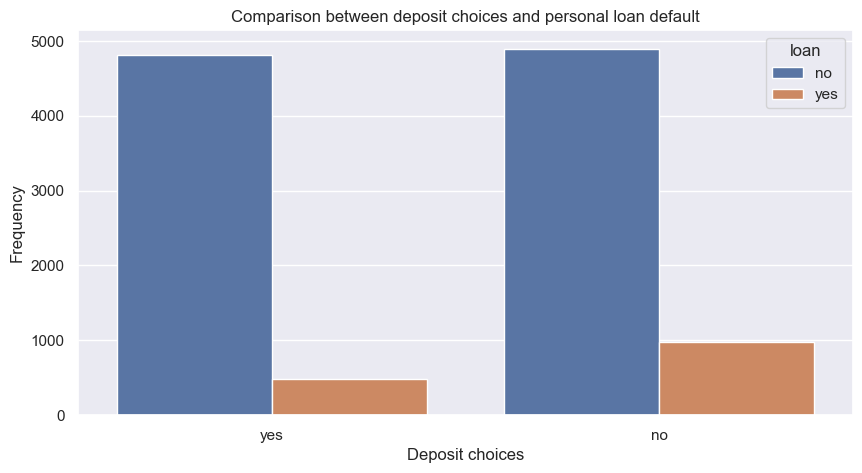

In [27]:

#compare deposit choices and personal loan default
plt.figure(figsize = (10, 5))

sns.countplot(data = data, x = 'deposit', hue = 'loan')
plt.title("Comparison between deposit choices and personal loan default")
plt.xlabel("Deposit choices")
plt.ylabel("Frequency")
plt.show()

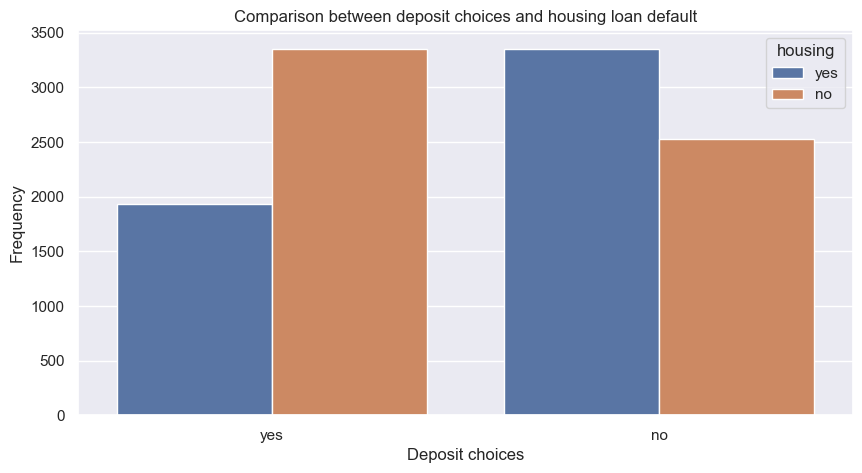

In [28]:
#compare deposit choices and housing loan default
plt.figure(figsize = (10, 5))

sns.countplot(data = data, x = 'deposit', hue = 'housing')
plt.title("Comparison between deposit choices and housing loan default")
plt.xlabel("Deposit choices")
plt.ylabel("Frequency")
plt.show()

This imply that customers are having high housing loan but if the bank gives them a good interest. The target custumers can still invest more even while they are on there housing loan.

### **customer occupation in respect to their education level**

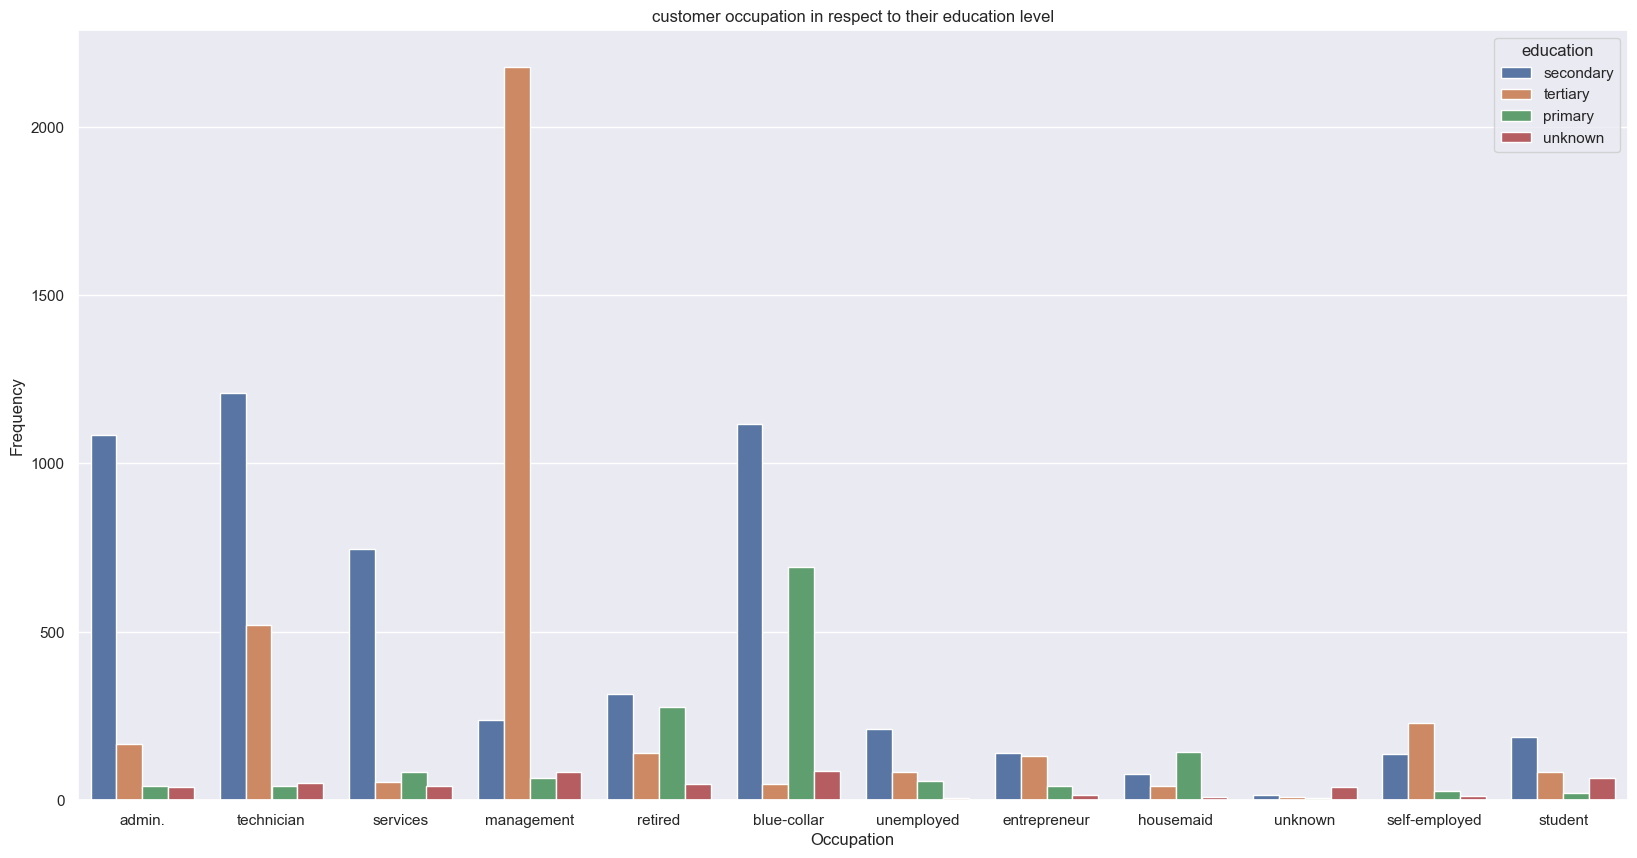

In [29]:
#customer occupation in respect to their education level
plt.figure(figsize = (20, 10))
sns.countplot(data = data, x = 'job', hue = 'education')
plt.title("customer occupation in respect to their education level")
plt.xlabel("Occupation")
plt.ylabel("Frequency")
plt.show()

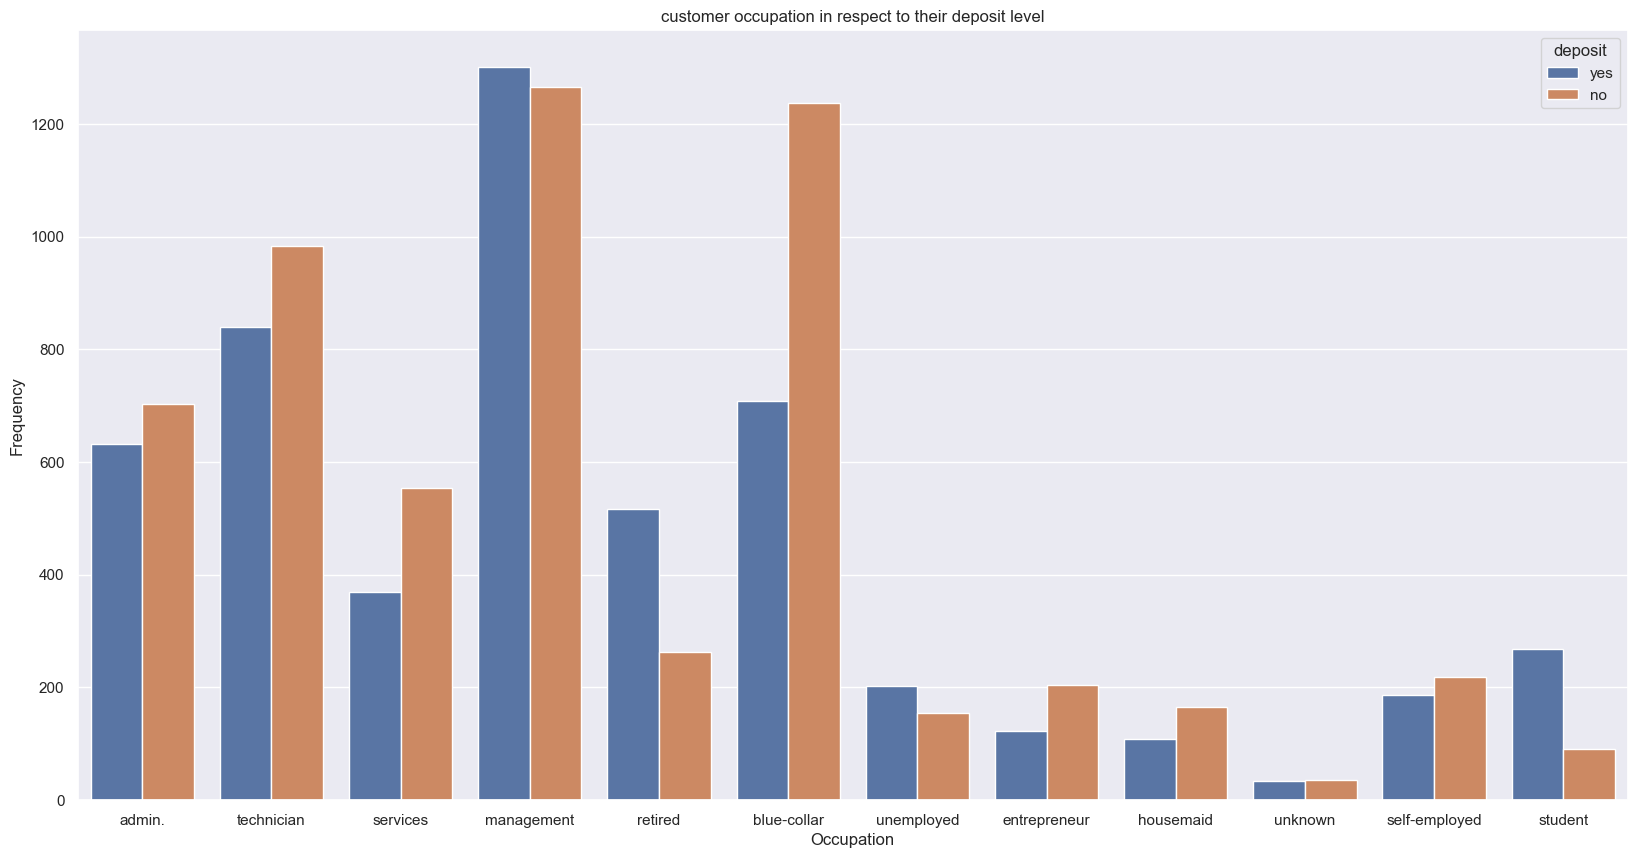

In [30]:
#customer occupation in respect to their deposit level
plt.figure(figsize = (20, 10))
sns.countplot(data = data, x = 'job', hue = 'deposit')
plt.title("customer occupation in respect to their deposit level")
plt.xlabel("Occupation")
plt.ylabel("Frequency")
plt.show()

Comparison between customer decision in previous campaign and present campaign

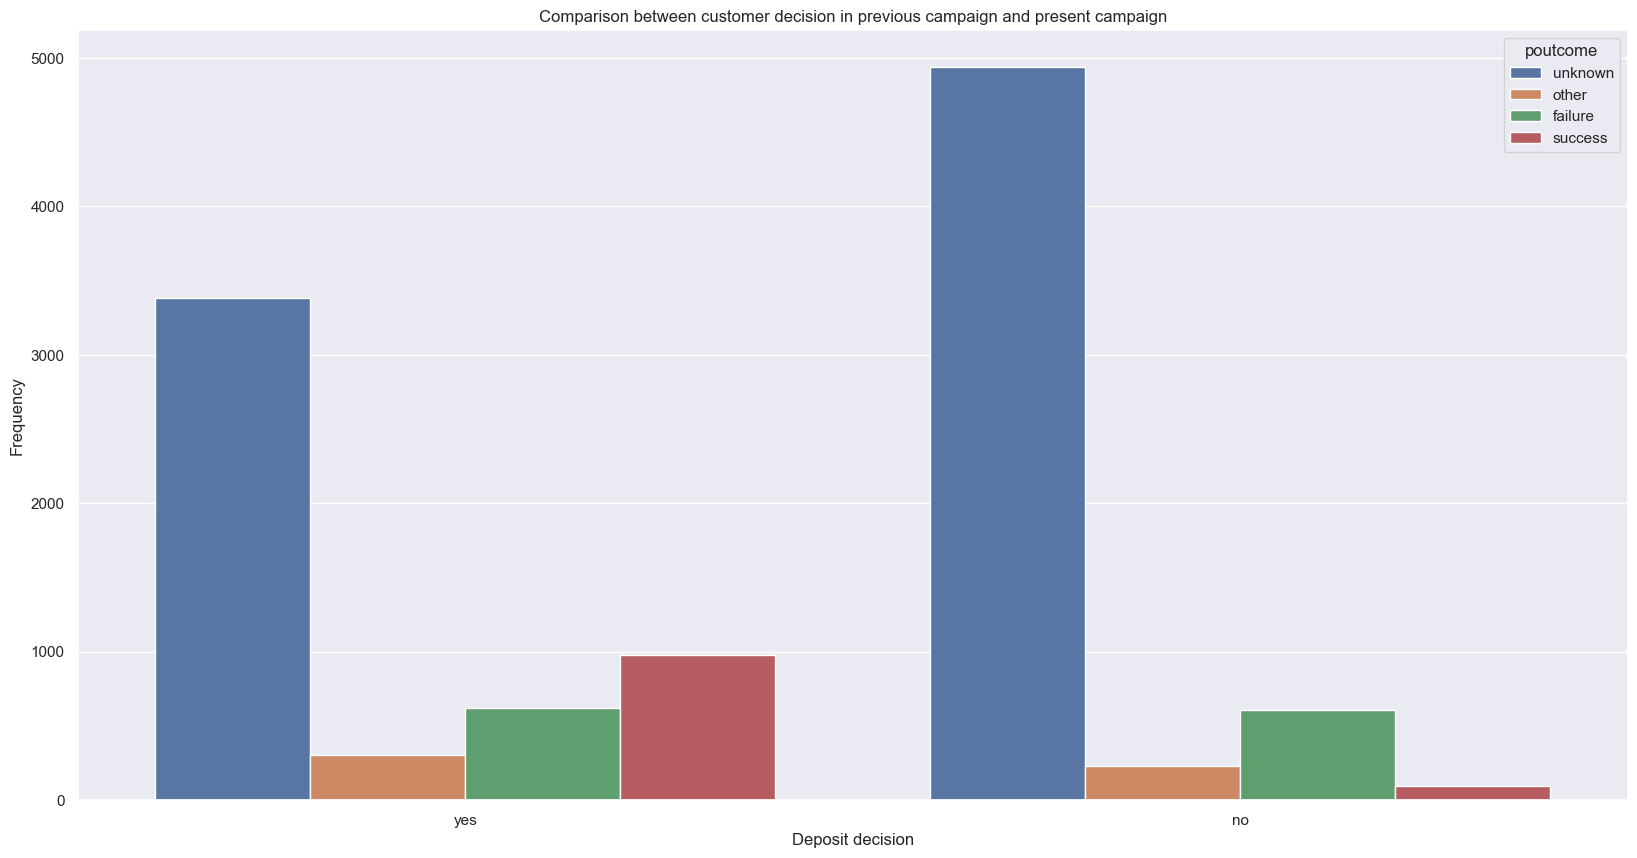

In [31]:
plt.figure(figsize = (20, 10))
sns.countplot(data = data, x = 'deposit', hue = 'poutcome')
plt.title("Comparison between customer decision in previous campaign and present campaign")
plt.xlabel("Deposit decision")
plt.ylabel("Frequency")
plt.show()

In [32]:
data["marital"].value_counts() #marital distribution

married     6351
single      3518
divorced    1293
Name: marital, dtype: int64

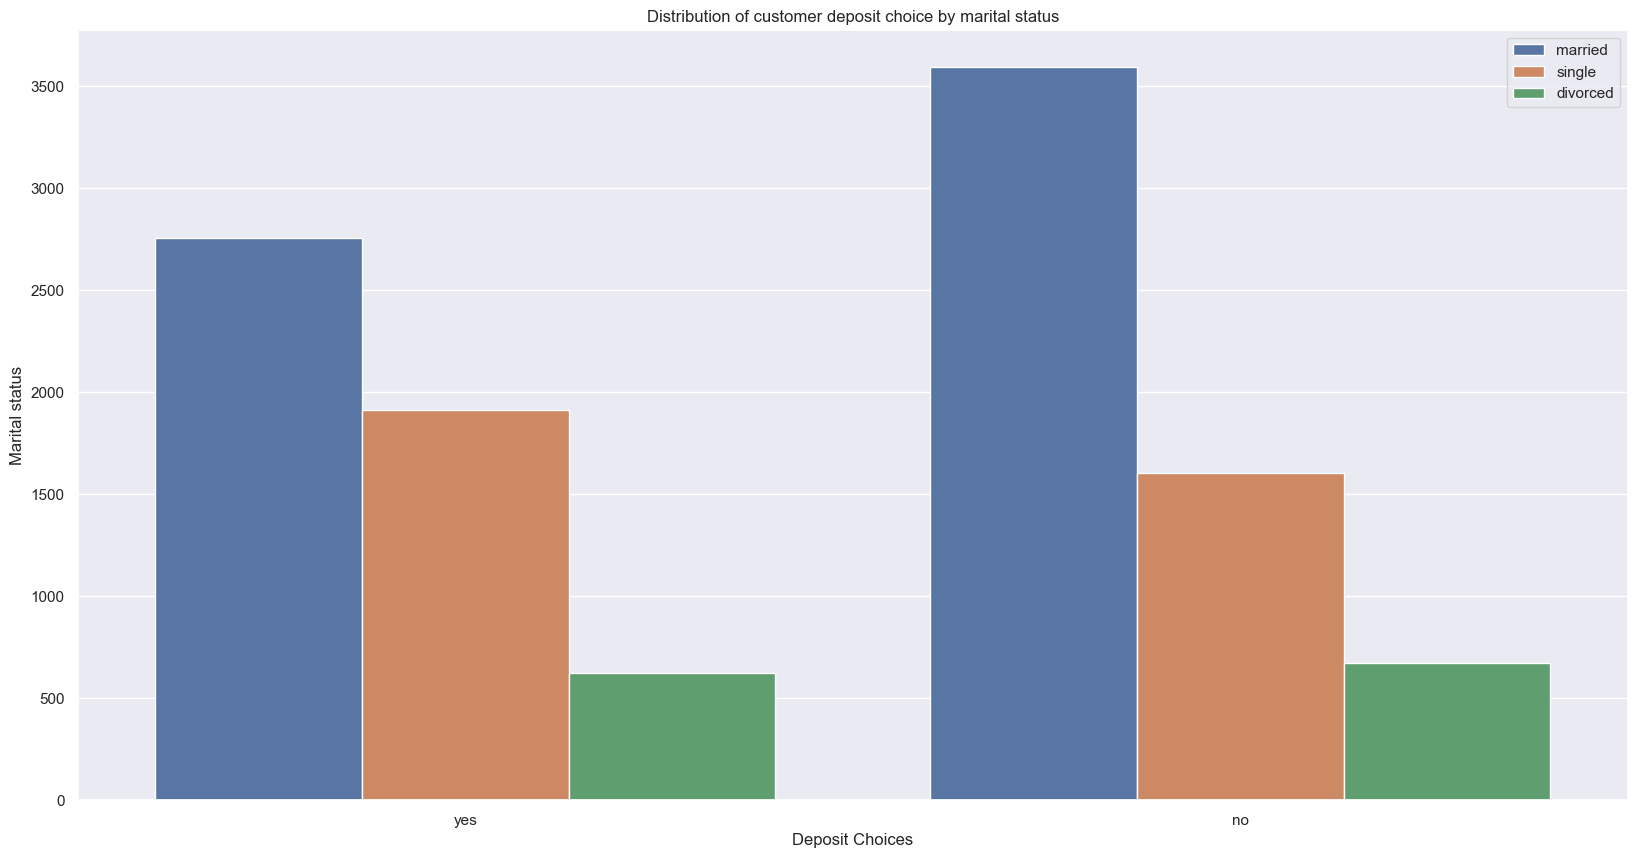

In [33]:
#deposit choice and credit default
plt.figure(figsize = (20, 10))
sns.countplot(data = data, x = 'deposit', hue = 'marital')
plt.title("Distribution of customer deposit choice by marital status")
plt.xlabel("Deposit Choices")
plt.ylabel("Marital status")
plt.legend()
plt.show()

## Observation:
There is no appreciable difference in deposit choice based on marital status. This is due to the fact that although the married people are more likely to make the deposit, than single people, who are in turn more likely to do so than divorced people, the same pattern holds true for the non-depositing segment of the sample. This might imply either that (a.) marital status and the choice to make deposits have little correlation in this dataset or (b.) married people are not well-represented in the data, making it dificult to get a good read on the situation. More data for analysis would be required here.

In [34]:
#create a marital heatmap

m = {
    "married": 0,
    "single": 1,
    "divorced": 2
}

#obtain correlation between the marital status and deposit choices
data.loc[:, ["marital"]].applymap(lambda x: m[x]).corrwith(data["deposit"].apply(lambda x:1 if x=="yes" else 0), method = "spearman")


marital    0.080399
dtype: float64

## Customer deposit decision with respect to interval of telemarketing calls
In order to ensure that the customers are not hounded with telemarketing calls, it would make some sense to have a good idea of the optimal interval to make those calls in. Doing this would involve:

Knowing the cases of success, and
understanding the distribution of time passing between the calls made.

In [35]:
#extract successful segment from this data
success = data.loc[data["deposit"] == "yes"]
success.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


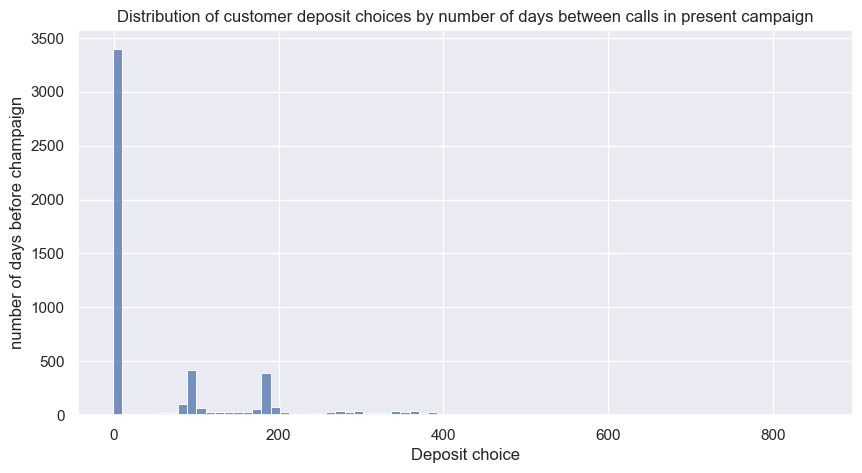

In [36]:
#deposit choice vs numbers of days call
plt.figure(figsize= (10, 5))
sns.histplot(data = success, x = "pdays")
plt.title("Distribution of customer deposit choices by number of days between calls in present campaign")
plt.xlabel("Deposit choice")
plt.ylabel("number of days before champaign")
plt.show()

In [37]:
success["pdays"].value_counts()

-1      3384
 92       96
 182      80
 91       75
 181      74
        ... 
 478       1
 339       1
 421       1
 223       1
 36        1
Name: pdays, Length: 423, dtype: int64

The histogram generated above is quite telling in its implications. It would seem that an astounding majority of successes are recorded from people who are called as soon as possible between campaigns. From our data dictionary, we know that customers who did not participate in the previous campaign are represented with a pdays value of -1. It might be that these people consitue a large portion of the tall peak of our histogram above.

An attempt to support/weaken this argument can be made; visualize the same variables, with the:

outcome of the previous campaign (poutcome),
the number of times the customer was actually contacted in the prevcious campaign (previous), and
the number of times the customer was contacted in this present campaign (campaign)
In addition, we can visualize the distribution of:

The number of calls made in the present campaign (campaign) which resulted in successful deposits in the present telemarketing campaign.
The number of calls made in the previous campaign (previous) which resulted in successful deposits in the previous telemarketing campaign.

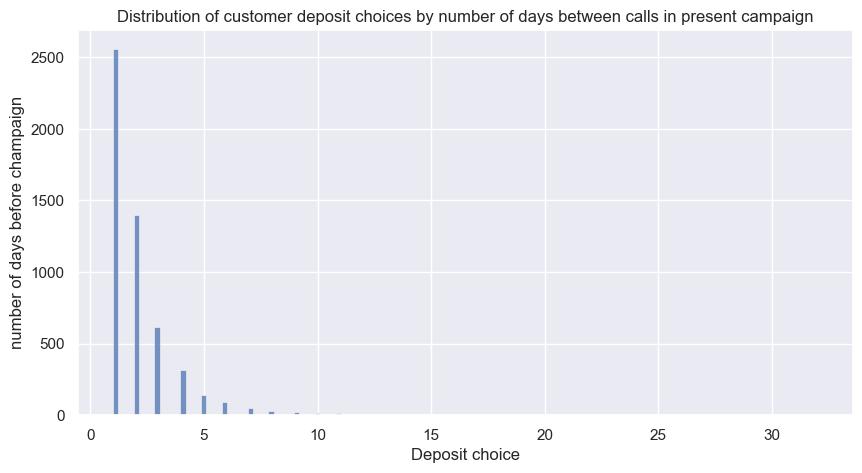

In [38]:
#distribution of numbers of champaign that ended to succesful deposit
plt.figure(figsize = (10, 5))
sns.histplot(data = success, x = "campaign")
plt.title("Distribution of customer deposit choices by number of days between calls in present campaign")
plt.xlabel("Deposit choice")
plt.ylabel("number of days before champaign")
plt.show()


In [39]:
#extract successful segment from the previous champaign
prev_success = data.loc[data["poutcome"] == "success"]
prev_success.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
899,56,technician,married,secondary,no,589,yes,no,unknown,23,oct,518,1,147,2,success,yes
951,53,retired,married,tertiary,no,2269,no,no,cellular,17,nov,1091,2,150,1,success,yes
985,46,unemployed,divorced,secondary,no,3354,yes,no,cellular,19,nov,522,1,174,1,success,yes
994,40,management,married,tertiary,no,3352,yes,no,cellular,19,nov,639,2,27,1,success,yes
1151,31,management,married,tertiary,no,1331,no,no,cellular,3,feb,182,2,90,1,success,yes


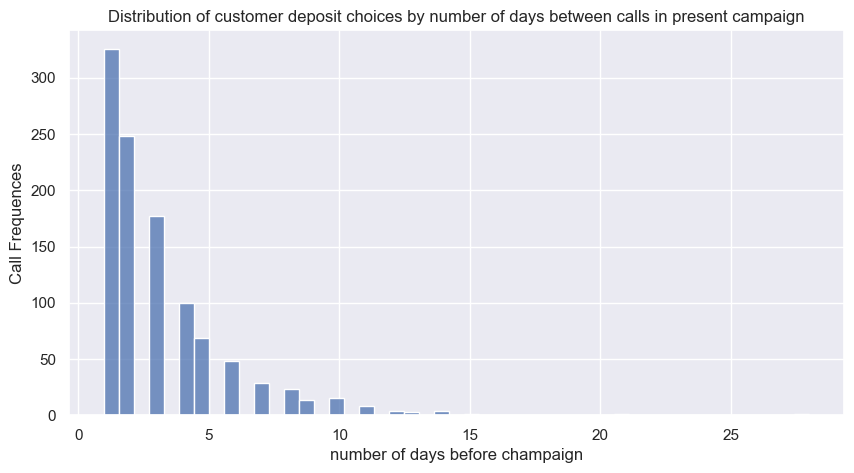

In [40]:
#distribution of call frequency from previous champaign
plt.figure(figsize = (10, 5))
sns.histplot(data = prev_success, x = "previous")
plt.title("Distribution of customer deposit choices by number of days between calls in present campaign")
plt.xlabel("number of days before champaign")
plt.ylabel("Call Frequences")
plt.show()

## Observation:
It shows on this histogram that more calls will needs to made to secure more deposit by the customer.

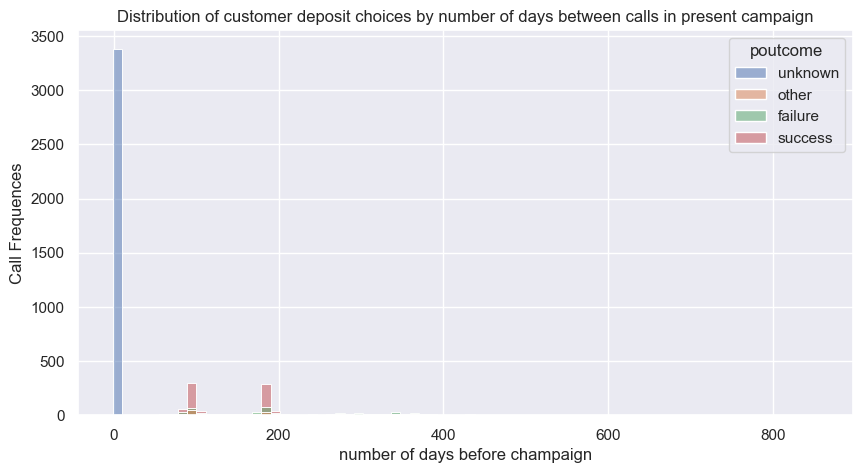

In [41]:
#Distribution between time of calls vs previous champaign
plt.figure(figsize = (10, 5))
sns.histplot(data = success, x = "pdays", hue = "poutcome")
plt.title("Distribution of customer deposit choices by number of days between calls in present campaign")
plt.xlabel("number of days before champaign")
plt.ylabel("Call Frequences")
plt.show()

## Recommendations for Elite Bank:

- Focus on contacting recent leads and new prospects quickly after campaigns.

- Prioritize customers who responded positively to previous campaigns, even if they were contacted a while ago.

- Maintain regular engagement with all customers to keep interest high and improve future conversion rates.

## Label Imbalance

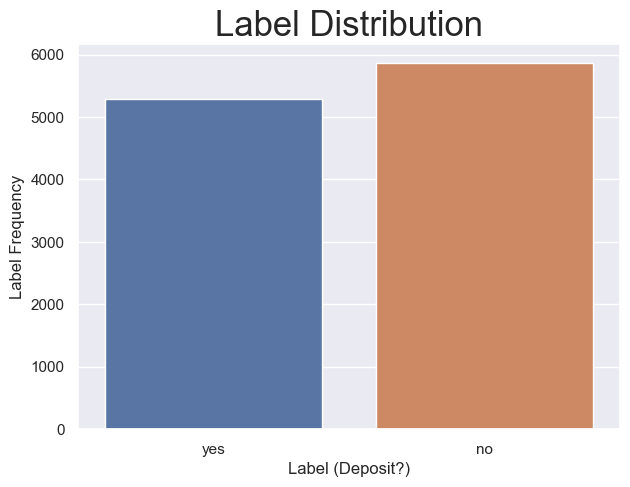

In [42]:
# Distribution of labels
plt.figure(figsize = (7, 5))
sns.countplot(data = data, x = "deposit",)

plt.title("Label Distribution", fontsize = 25)

plt.xlabel("Label (Deposit?)")
plt.ylabel("Label Frequency")

plt.show(); plt.close("all")

## Check for duplicate record

In [43]:
#check for duplicate records
num_duplicated = len(data.loc[data.duplicated()])
print("Number of duplicated records: ", num_duplicated)

Number of duplicated records:  0


## Correlation

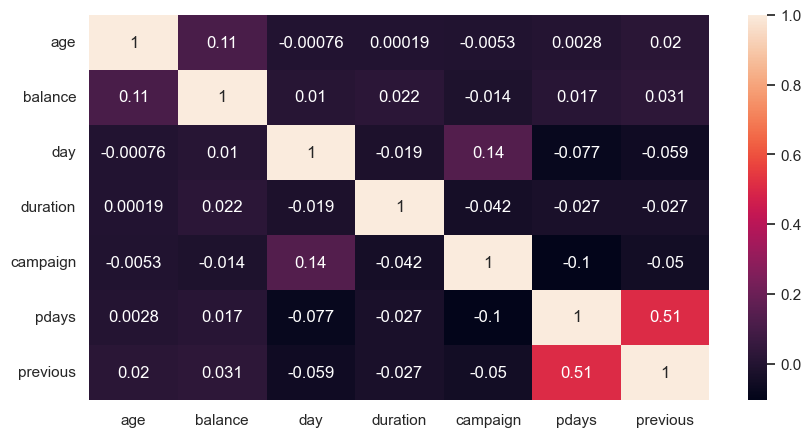

In [44]:
corr = data.select_dtypes(exclude = ["object"]).corr(method = "pearson")
plt.figure(figsize = (10, 5))
sns.heatmap(corr, annot = True)
plt.show()

In [45]:
#correlation between the target variable and the independent variable
target = data['deposit'].apply(lambda x: 1 if x == "yes" else 0)
data.select_dtypes(exclude = ["object"]).corrwith(target, method = "spearman")

age        -0.012156
balance     0.157584
day        -0.058325
duration    0.527801
campaign   -0.126666
pdays       0.212805
previous    0.229905
dtype: float64

Observation:
In this correlation between target variable and independent variable, there is no strong correlation between the target variable and independent variable. meaning, any trained model will have difficulty to learn from the data. The independent variable that can be used in this insights are:

- Balance
- Duration
- Pdays
- Previous



## Data Implication

- Implied by our findings above, we can say the following:

- Missing values: There are no missing values in the dataset.

- Data duplication: There are no duplicated values in the dataset.

- Correlation: For the most part, although there are some instances of multicollinearity, the features exhibit very little correlation with one another, hence ensuring feature independence. However, the target variable exhibits a low correlation with the independent variables.

- Categorical features: There are a few categorical features in the dataset (job, marital, education, default, housing, loan, contact, poutcome, and deposit). These will need to be encoded in some way.

## Data Preparation

Following the previously identified data implications, the data preparation stage will involve the following steps:

- Data Splitting: Divide the dataset into training and testing sets.

- Feature Encoding: Convert categorical features into a suitable numerical format.

- Feature Scaling: Scale features with large magnitudes or ranges (such as balance and duration) to ensure consistency across the dataset.



In [46]:
from sklearn.model_selection import train_test_split

In [47]:
data.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [48]:
column = ["age", "balance", "duration", "day"]
category_column = data.select_dtypes(include = ["object"]).columns.tolist()
category_column.remove("deposit")

In [49]:
category_column

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [50]:
#extract features and label from dataset
X, y = data.drop(labels = "deposit", axis = 1), data["deposit"]
map_dictionary = {"yes": 1, "no": 0} #Encode the label
y = y.apply(lambda x: map_dictionary[x])

In [51]:
#split data into trained and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify= y)

In [52]:
X_train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
9157,34,blue-collar,single,secondary,no,550,yes,no,cellular,20,apr,90,3,346,1,failure
9468,52,services,married,secondary,no,431,no,no,cellular,26,aug,73,17,-1,0,unknown
1784,29,management,single,tertiary,no,9407,no,no,cellular,4,may,267,6,-1,0,unknown
125,35,blue-collar,married,primary,no,994,yes,no,unknown,23,may,1349,8,-1,0,unknown
5760,48,admin.,married,secondary,no,1131,no,yes,cellular,8,may,49,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8740,39,services,married,secondary,no,2,yes,no,cellular,25,jul,174,10,-1,0,unknown
10004,38,management,single,unknown,no,715,yes,no,cellular,2,apr,951,1,132,3,failure
11075,41,management,married,tertiary,no,3872,no,no,cellular,15,oct,231,1,-1,0,unknown
11113,43,admin.,married,secondary,no,616,yes,no,unknown,9,may,168,2,-1,0,unknown


## Data Modelling

The three model that will be used are:
- Logistic Regression
- CatBoost
- ExtraTrees

In [53]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [54]:
# Utilities for data preparation
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Utilities for data scaling
from sklearn.pipeline import Pipeline

# Utilities for modeling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from catboost import CatBoostClassifier

In [55]:
#implement data preparation transformer
def get_transformer(category_column, column, one_hot = False):
  if one_hot:
    transformer = ColumnTransformer(
        transformers = [
            ("ord", OneHotEncoder(sparse_output = False, handle_unknown = "ignore"), category_column),
            ("scale", StandardScaler(), column)
        ],
        remainder = "passthrough"
    )
  else:
      transformer = ColumnTransformer(
          transformers = [
              ("ord", OrdinalEncoder(handle_unknown = "use_encoded_value", unknown_value = -1), category_column),
              ("scale", StandardScaler(), column)
              ],
          remainder = "passthrough"
      )
  return transformer

In [56]:
#initiate models
logis_pipe = Pipeline(
    steps = [
        ("1", get_transformer(category_column, column, one_hot = True)),
        ("2", LogisticRegression(max_iter= 1000))

    ]
)

cat_pipe = Pipeline(
    steps = [
        ("1", get_transformer(category_column, column, one_hot = False)),
        ("2", CatBoostClassifier())
    ]
)

extra_pipe = Pipeline(
    steps = [
        ("1", get_transformer(category_column, column, one_hot = False)),
        ("2", ExtraTreesClassifier())
    ]
)

In [57]:
#fit ExtraTree
extra_pipe.fit(X_train, y_train)

C:\Users\abrah\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ord',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'poutcome']),
                                                 ('scale', StandardScaler(),
                                                  ['age', 'balance', 'duration',
                                                   'day'])])),
                ('2', ExtraTreesClassifier())])

In [58]:
#fit logistic regression
logis_pipe.fit(X_train, y_train)

C:\Users\abrah\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ord',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'poutcome']),
                                                 ('scale', StandardScaler(),
                                                  ['age', 'balance', 'duration',
                                                   'day'])])),
                ('2', LogisticRegression(max_iter=1000))])

In [59]:
#fit catBoost
cat_pipe.fit(X_train, y_train)

Learning rate set to 0.024784
0:	learn: 0.6792166	total: 165ms	remaining: 2m 45s
1:	learn: 0.6671132	total: 174ms	remaining: 1m 26s
2:	learn: 0.6554833	total: 183ms	remaining: 1m
3:	learn: 0.6425694	total: 192ms	remaining: 47.8s
4:	learn: 0.6312224	total: 201ms	remaining: 39.9s
5:	learn: 0.6201029	total: 209ms	remaining: 34.6s
6:	learn: 0.6099710	total: 217ms	remaining: 30.7s
7:	learn: 0.5998573	total: 226ms	remaining: 28s
8:	learn: 0.5904846	total: 232ms	remaining: 25.6s
9:	learn: 0.5820685	total: 238ms	remaining: 23.6s
10:	learn: 0.5750607	total: 243ms	remaining: 21.9s
11:	learn: 0.5671610	total: 248ms	remaining: 20.4s
12:	learn: 0.5590290	total: 251ms	remaining: 19.1s
13:	learn: 0.5522366	total: 255ms	remaining: 18s
14:	learn: 0.5450324	total: 258ms	remaining: 17s
15:	learn: 0.5400776	total: 261ms	remaining: 16.1s
16:	learn: 0.5349284	total: 266ms	remaining: 15.4s
17:	learn: 0.5295945	total: 269ms	remaining: 14.7s
18:	learn: 0.5237340	total: 272ms	remaining: 14.1s
19:	learn: 0.51866

199:	learn: 0.3432761	total: 975ms	remaining: 3.9s
200:	learn: 0.3430708	total: 980ms	remaining: 3.89s
201:	learn: 0.3428808	total: 984ms	remaining: 3.88s
202:	learn: 0.3424680	total: 988ms	remaining: 3.88s
203:	learn: 0.3421579	total: 992ms	remaining: 3.87s
204:	learn: 0.3420184	total: 998ms	remaining: 3.87s
205:	learn: 0.3415838	total: 1s	remaining: 3.86s
206:	learn: 0.3410602	total: 1s	remaining: 3.85s
207:	learn: 0.3407101	total: 1.01s	remaining: 3.84s
208:	learn: 0.3403272	total: 1.01s	remaining: 3.83s
209:	learn: 0.3401144	total: 1.01s	remaining: 3.82s
210:	learn: 0.3398838	total: 1.02s	remaining: 3.81s
211:	learn: 0.3396153	total: 1.02s	remaining: 3.8s
212:	learn: 0.3392231	total: 1.02s	remaining: 3.79s
213:	learn: 0.3389490	total: 1.03s	remaining: 3.78s
214:	learn: 0.3386597	total: 1.03s	remaining: 3.77s
215:	learn: 0.3384273	total: 1.03s	remaining: 3.76s
216:	learn: 0.3381664	total: 1.04s	remaining: 3.75s
217:	learn: 0.3380030	total: 1.04s	remaining: 3.74s
218:	learn: 0.337800

365:	learn: 0.3057788	total: 1.58s	remaining: 2.74s
366:	learn: 0.3056728	total: 1.58s	remaining: 2.73s
367:	learn: 0.3055097	total: 1.59s	remaining: 2.73s
368:	learn: 0.3052926	total: 1.59s	remaining: 2.72s
369:	learn: 0.3050884	total: 1.6s	remaining: 2.72s
370:	learn: 0.3050267	total: 1.6s	remaining: 2.71s
371:	learn: 0.3048093	total: 1.6s	remaining: 2.71s
372:	learn: 0.3044350	total: 1.61s	remaining: 2.71s
373:	learn: 0.3043087	total: 1.61s	remaining: 2.7s
374:	learn: 0.3040688	total: 1.62s	remaining: 2.69s
375:	learn: 0.3038280	total: 1.62s	remaining: 2.69s
376:	learn: 0.3035449	total: 1.63s	remaining: 2.69s
377:	learn: 0.3032805	total: 1.63s	remaining: 2.68s
378:	learn: 0.3031745	total: 1.63s	remaining: 2.67s
379:	learn: 0.3030264	total: 1.64s	remaining: 2.67s
380:	learn: 0.3028162	total: 1.64s	remaining: 2.66s
381:	learn: 0.3026998	total: 1.64s	remaining: 2.66s
382:	learn: 0.3024772	total: 1.65s	remaining: 2.65s
383:	learn: 0.3022576	total: 1.65s	remaining: 2.65s
384:	learn: 0.30

524:	learn: 0.2786817	total: 2.19s	remaining: 1.98s
525:	learn: 0.2785101	total: 2.2s	remaining: 1.98s
526:	learn: 0.2784335	total: 2.2s	remaining: 1.98s
527:	learn: 0.2783158	total: 2.2s	remaining: 1.97s
528:	learn: 0.2781844	total: 2.21s	remaining: 1.97s
529:	learn: 0.2780712	total: 2.21s	remaining: 1.96s
530:	learn: 0.2778610	total: 2.22s	remaining: 1.96s
531:	learn: 0.2777562	total: 2.22s	remaining: 1.96s
532:	learn: 0.2776338	total: 2.23s	remaining: 1.95s
533:	learn: 0.2775290	total: 2.23s	remaining: 1.95s
534:	learn: 0.2774149	total: 2.23s	remaining: 1.94s
535:	learn: 0.2772593	total: 2.24s	remaining: 1.94s
536:	learn: 0.2770636	total: 2.24s	remaining: 1.93s
537:	learn: 0.2769228	total: 2.25s	remaining: 1.93s
538:	learn: 0.2767717	total: 2.25s	remaining: 1.93s
539:	learn: 0.2766484	total: 2.26s	remaining: 1.92s
540:	learn: 0.2765453	total: 2.26s	remaining: 1.92s
541:	learn: 0.2762885	total: 2.27s	remaining: 1.91s
542:	learn: 0.2761799	total: 2.27s	remaining: 1.91s
543:	learn: 0.2

712:	learn: 0.2555695	total: 3s	remaining: 1.21s
713:	learn: 0.2555035	total: 3s	remaining: 1.2s
714:	learn: 0.2554093	total: 3s	remaining: 1.2s
715:	learn: 0.2552665	total: 3.01s	remaining: 1.19s
716:	learn: 0.2551947	total: 3.01s	remaining: 1.19s
717:	learn: 0.2551410	total: 3.02s	remaining: 1.19s
718:	learn: 0.2549990	total: 3.02s	remaining: 1.18s
719:	learn: 0.2548441	total: 3.02s	remaining: 1.18s
720:	learn: 0.2547014	total: 3.03s	remaining: 1.17s
721:	learn: 0.2544952	total: 3.03s	remaining: 1.17s
722:	learn: 0.2543709	total: 3.04s	remaining: 1.16s
723:	learn: 0.2542531	total: 3.04s	remaining: 1.16s
724:	learn: 0.2541485	total: 3.04s	remaining: 1.15s
725:	learn: 0.2540855	total: 3.05s	remaining: 1.15s
726:	learn: 0.2539527	total: 3.05s	remaining: 1.15s
727:	learn: 0.2537796	total: 3.06s	remaining: 1.14s
728:	learn: 0.2536962	total: 3.06s	remaining: 1.14s
729:	learn: 0.2535113	total: 3.06s	remaining: 1.13s
730:	learn: 0.2534083	total: 3.07s	remaining: 1.13s
731:	learn: 0.2533094	t

915:	learn: 0.2352550	total: 3.8s	remaining: 348ms
916:	learn: 0.2351712	total: 3.8s	remaining: 344ms
917:	learn: 0.2350399	total: 3.81s	remaining: 340ms
918:	learn: 0.2349078	total: 3.81s	remaining: 336ms
919:	learn: 0.2348507	total: 3.81s	remaining: 332ms
920:	learn: 0.2347516	total: 3.82s	remaining: 328ms
921:	learn: 0.2346398	total: 3.82s	remaining: 324ms
922:	learn: 0.2345214	total: 3.83s	remaining: 319ms
923:	learn: 0.2343513	total: 3.83s	remaining: 315ms
924:	learn: 0.2342872	total: 3.84s	remaining: 311ms
925:	learn: 0.2341870	total: 3.84s	remaining: 307ms
926:	learn: 0.2341084	total: 3.85s	remaining: 303ms
927:	learn: 0.2340655	total: 3.85s	remaining: 299ms
928:	learn: 0.2339298	total: 3.85s	remaining: 295ms
929:	learn: 0.2338240	total: 3.86s	remaining: 290ms
930:	learn: 0.2337644	total: 3.86s	remaining: 286ms
931:	learn: 0.2337187	total: 3.87s	remaining: 282ms
932:	learn: 0.2336481	total: 3.87s	remaining: 278ms
933:	learn: 0.2335212	total: 3.88s	remaining: 274ms
934:	learn: 0.

C:\Users\abrah\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ord',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'poutcome']),
                                                 ('scale', StandardScaler(),
                                                  ['age', 'balance', 'duration',
                                                   'day'])])),
                ('2',
                 <catboost.core.CatBoostClassifier object at 0x00000195B5E60FD0>)])

## Model Evaluation

Using ML FLow

In [60]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from mlflow.models.signature import infer_signature
import mlflow
import mlflow.sklearn

def test_model(model, data, run_name="default_run"):
    train, test = data
    X_train, y_train = train
    X_test, y_test = test

    mlflow.set_experiment("long_term_investor_detection")

    with mlflow.start_run(run_name=run_name):
        
        
        # Train model
        model.fit(X_train, y_train)

        # Predict
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)
        y_proba_test = model.predict_proba(X_test)[:, 1]

        # Print classification reports (your format)
        print("=" * 30, "Train Report", "=" * 30)
        train_results = classification_report(y_train, y_pred_train)
        print(train_results)

        print("=" * 30, "Test Report", "=" * 30)
        test_results = classification_report(y_test, y_pred_test)
        print(test_results)

        # Log metrics
        acc = accuracy_score(y_test, y_pred_test)
        prec = precision_score(y_test, y_pred_test)
        rec = recall_score(y_test, y_pred_test)
        f1 = f1_score(y_test, y_pred_test)

        mlflow.log_metric("accuracy", acc)
        mlflow.log_metric("precision", prec)
        mlflow.log_metric("recall", rec)
        mlflow.log_metric("f1_score", f1)

        # Log model with signature + input sample
        input_example = X_test.iloc[:5]
        signature = infer_signature(input_example, model.predict(input_example))

        mlflow.sklearn.log_model(
            sk_model=model,
            artifact_path=f"{run_name}_model",
            input_example=input_example,
            signature=signature
        )


In [61]:
#def test_model(model, data):
 # # Extract train and test set from passed data variable
  #train, test = data

  #extract features and targets from train and test
  #X_train, y_train = train
  #X_test, y_test = test

  #obtain train and test classification result
  #train_result = classification_report(y_train, model.predict(X_train))
  #test_result = classification_report(y_test, model.predict(X_test))

#  print("="*30, "Train Report", "="*30, "\n")
 # print(train_result)

  #print("="*30, "Test Report", "="*30, "\n")
  #print(test_result)

  #return train_result, test_result

In [62]:
#assemble data for testing
data = [[X_train, y_train], [X_test, y_test]]

data

[[       age          job   marital  education default  balance housing loan  \
  9157    34  blue-collar    single  secondary      no      550     yes   no   
  9468    52     services   married  secondary      no      431      no   no   
  1784    29   management    single   tertiary      no     9407      no   no   
  125     35  blue-collar   married    primary      no      994     yes   no   
  5760    48       admin.   married  secondary      no     1131      no  yes   
  ...    ...          ...       ...        ...     ...      ...     ...  ...   
  8740    39     services   married  secondary      no        2     yes   no   
  10004   38   management    single    unknown      no      715     yes   no   
  11075   41   management   married   tertiary      no     3872      no   no   
  11113   43       admin.   married  secondary      no      616     yes   no   
  8938    42   management  divorced   tertiary      no      742     yes   no   
  
          contact  day month  duratio

In [63]:
#evaluate logistic regression
test_model(logis_pipe, data, run_name="logistic_regression")

2025/05/04 14:05:06 WARNING mlflow.utils.git_utils: Failed to import Git (the Git executable is probably not on your PATH), so Git SHA is not available. Error: Failed to initialize: Bad git executable.
The git executable must be specified in one of the following ways:
    - be included in your $PATH
    - be set via $GIT_PYTHON_GIT_EXECUTABLE
    - explicitly set via git.refresh()

All git commands will error until this is rectified.

This initial warning can be silenced or aggravated in the future by setting the
$GIT_PYTHON_REFRESH environment variable. Use one of the following values:
    - quiet|q|silence|s|none|n|0: for no warning or exception
    - warn|w|warning|1: for a printed warning
    - error|e|raise|r|2: for a raised exception

Example:
    export GIT_PYTHON_REFRESH=quiet



============================== Train Report ==============================
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      4111
           1       0.83      0.80      0.82      3702

    accuracy                           0.83      7813
   macro avg       0.83      0.83      0.83      7813
weighted avg       0.83      0.83      0.83      7813

============================== Test Report ==============================
              precision    recall  f1-score   support

           0       0.81      0.87      0.84      1762
           1       0.84      0.77      0.80      1587

    accuracy                           0.82      3349
   macro avg       0.82      0.82      0.82      3349
weighted avg       0.82      0.82      0.82      3349



C:\Users\abrah\anaconda3\lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2025/05/04 14:05:15 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: C:\Users\abrah\AppData\Local\Temp\tmp4yde0xeb\model\model.pkl, flavor: sklearn). Fall back to return ['scikit-lear

In [64]:
#evaluate for ExtraTree
test_model(extra_pipe, data, run_name="extra_trees")

============================== Train Report ==============================
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4111
           1       1.00      1.00      1.00      3702

    accuracy                           1.00      7813
   macro avg       1.00      1.00      1.00      7813
weighted avg       1.00      1.00      1.00      7813

============================== Test Report ==============================
              precision    recall  f1-score   support

           0       0.85      0.84      0.84      1762
           1       0.82      0.83      0.83      1587

    accuracy                           0.84      3349
   macro avg       0.83      0.83      0.83      3349
weighted avg       0.84      0.84      0.84      3349



C:\Users\abrah\anaconda3\lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2025/05/04 14:05:25 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: C:\Users\abrah\AppData\Local\Temp\tmpkkd0p08d\model\model.pkl, flavor: sklearn). Fall back to return ['scikit-lear

In [65]:
#evaluation for catBoost
test_model(cat_pipe, data, run_name="catboost")

Learning rate set to 0.024784
0:	learn: 0.6792166	total: 6.83ms	remaining: 6.83s
1:	learn: 0.6671132	total: 12.2ms	remaining: 6.07s
2:	learn: 0.6554833	total: 15.7ms	remaining: 5.22s
3:	learn: 0.6425694	total: 19.2ms	remaining: 4.78s
4:	learn: 0.6312224	total: 23.5ms	remaining: 4.67s
5:	learn: 0.6201029	total: 27.1ms	remaining: 4.48s
6:	learn: 0.6099710	total: 30.8ms	remaining: 4.37s
7:	learn: 0.5998573	total: 34.7ms	remaining: 4.3s
8:	learn: 0.5904846	total: 38.7ms	remaining: 4.26s
9:	learn: 0.5820685	total: 42.9ms	remaining: 4.25s
10:	learn: 0.5750607	total: 46.9ms	remaining: 4.22s
11:	learn: 0.5671610	total: 50.7ms	remaining: 4.17s
12:	learn: 0.5590290	total: 55.2ms	remaining: 4.19s
13:	learn: 0.5522366	total: 59.3ms	remaining: 4.18s
14:	learn: 0.5450324	total: 63.1ms	remaining: 4.14s
15:	learn: 0.5400776	total: 66.8ms	remaining: 4.11s
16:	learn: 0.5349284	total: 70.8ms	remaining: 4.1s
17:	learn: 0.5295945	total: 74.5ms	remaining: 4.06s
18:	learn: 0.5237340	total: 78.3ms	remaining: 

180:	learn: 0.3488981	total: 778ms	remaining: 3.52s
181:	learn: 0.3487939	total: 782ms	remaining: 3.52s
182:	learn: 0.3485480	total: 786ms	remaining: 3.51s
183:	learn: 0.3483137	total: 790ms	remaining: 3.5s
184:	learn: 0.3478218	total: 795ms	remaining: 3.5s
185:	learn: 0.3475256	total: 799ms	remaining: 3.5s
186:	learn: 0.3470309	total: 804ms	remaining: 3.5s
187:	learn: 0.3467664	total: 811ms	remaining: 3.5s
188:	learn: 0.3462155	total: 818ms	remaining: 3.51s
189:	learn: 0.3459638	total: 822ms	remaining: 3.5s
190:	learn: 0.3457647	total: 826ms	remaining: 3.5s
191:	learn: 0.3454428	total: 830ms	remaining: 3.49s
192:	learn: 0.3452129	total: 834ms	remaining: 3.49s
193:	learn: 0.3450938	total: 838ms	remaining: 3.48s
194:	learn: 0.3447777	total: 842ms	remaining: 3.47s
195:	learn: 0.3444387	total: 846ms	remaining: 3.47s
196:	learn: 0.3441510	total: 850ms	remaining: 3.46s
197:	learn: 0.3437557	total: 854ms	remaining: 3.46s
198:	learn: 0.3434470	total: 857ms	remaining: 3.45s
199:	learn: 0.34327

343:	learn: 0.3102402	total: 1.59s	remaining: 3.03s
344:	learn: 0.3099966	total: 1.59s	remaining: 3.02s
345:	learn: 0.3098443	total: 1.6s	remaining: 3.02s
346:	learn: 0.3096424	total: 1.6s	remaining: 3.02s
347:	learn: 0.3094096	total: 1.61s	remaining: 3.01s
348:	learn: 0.3092271	total: 1.61s	remaining: 3.01s
349:	learn: 0.3089581	total: 1.62s	remaining: 3s
350:	learn: 0.3087678	total: 1.62s	remaining: 3s
351:	learn: 0.3084994	total: 1.63s	remaining: 3s
352:	learn: 0.3081787	total: 1.63s	remaining: 2.99s
353:	learn: 0.3080304	total: 1.64s	remaining: 2.99s
354:	learn: 0.3078494	total: 1.64s	remaining: 2.98s
355:	learn: 0.3077344	total: 1.64s	remaining: 2.97s
356:	learn: 0.3075430	total: 1.65s	remaining: 2.97s
357:	learn: 0.3073409	total: 1.65s	remaining: 2.96s
358:	learn: 0.3072284	total: 1.66s	remaining: 2.96s
359:	learn: 0.3070734	total: 1.66s	remaining: 2.95s
360:	learn: 0.3068522	total: 1.67s	remaining: 2.95s
361:	learn: 0.3065731	total: 1.67s	remaining: 2.94s
362:	learn: 0.3063445	t

526:	learn: 0.2784335	total: 2.41s	remaining: 2.16s
527:	learn: 0.2783158	total: 2.41s	remaining: 2.16s
528:	learn: 0.2781844	total: 2.42s	remaining: 2.15s
529:	learn: 0.2780712	total: 2.42s	remaining: 2.15s
530:	learn: 0.2778610	total: 2.43s	remaining: 2.14s
531:	learn: 0.2777562	total: 2.43s	remaining: 2.14s
532:	learn: 0.2776338	total: 2.44s	remaining: 2.14s
533:	learn: 0.2775290	total: 2.45s	remaining: 2.14s
534:	learn: 0.2774149	total: 2.46s	remaining: 2.14s
535:	learn: 0.2772593	total: 2.47s	remaining: 2.14s
536:	learn: 0.2770636	total: 2.47s	remaining: 2.13s
537:	learn: 0.2769228	total: 2.48s	remaining: 2.13s
538:	learn: 0.2767717	total: 2.49s	remaining: 2.13s
539:	learn: 0.2766484	total: 2.49s	remaining: 2.12s
540:	learn: 0.2765453	total: 2.5s	remaining: 2.12s
541:	learn: 0.2762885	total: 2.5s	remaining: 2.12s
542:	learn: 0.2761799	total: 2.51s	remaining: 2.11s
543:	learn: 0.2760416	total: 2.52s	remaining: 2.11s
544:	learn: 0.2759063	total: 2.52s	remaining: 2.1s
545:	learn: 0.2

685:	learn: 0.2584433	total: 3.21s	remaining: 1.47s
686:	learn: 0.2583198	total: 3.21s	remaining: 1.46s
687:	learn: 0.2582234	total: 3.22s	remaining: 1.46s
688:	learn: 0.2581219	total: 3.22s	remaining: 1.46s
689:	learn: 0.2580496	total: 3.23s	remaining: 1.45s
690:	learn: 0.2579400	total: 3.23s	remaining: 1.45s
691:	learn: 0.2577940	total: 3.24s	remaining: 1.44s
692:	learn: 0.2576901	total: 3.24s	remaining: 1.44s
693:	learn: 0.2575822	total: 3.25s	remaining: 1.43s
694:	learn: 0.2574689	total: 3.25s	remaining: 1.43s
695:	learn: 0.2574045	total: 3.25s	remaining: 1.42s
696:	learn: 0.2573233	total: 3.26s	remaining: 1.42s
697:	learn: 0.2572153	total: 3.26s	remaining: 1.41s
698:	learn: 0.2570514	total: 3.27s	remaining: 1.41s
699:	learn: 0.2569710	total: 3.27s	remaining: 1.4s
700:	learn: 0.2568761	total: 3.27s	remaining: 1.4s
701:	learn: 0.2567947	total: 3.28s	remaining: 1.39s
702:	learn: 0.2565965	total: 3.28s	remaining: 1.39s
703:	learn: 0.2564689	total: 3.29s	remaining: 1.38s
704:	learn: 0.

876:	learn: 0.2387399	total: 4.02s	remaining: 564ms
877:	learn: 0.2386600	total: 4.02s	remaining: 559ms
878:	learn: 0.2385811	total: 4.03s	remaining: 555ms
879:	learn: 0.2384316	total: 4.03s	remaining: 550ms
880:	learn: 0.2383305	total: 4.04s	remaining: 545ms
881:	learn: 0.2382291	total: 4.04s	remaining: 541ms
882:	learn: 0.2381221	total: 4.05s	remaining: 536ms
883:	learn: 0.2380537	total: 4.05s	remaining: 532ms
884:	learn: 0.2379820	total: 4.05s	remaining: 527ms
885:	learn: 0.2378452	total: 4.06s	remaining: 522ms
886:	learn: 0.2377881	total: 4.06s	remaining: 518ms
887:	learn: 0.2377243	total: 4.07s	remaining: 513ms
888:	learn: 0.2376135	total: 4.07s	remaining: 508ms
889:	learn: 0.2375403	total: 4.08s	remaining: 504ms
890:	learn: 0.2374148	total: 4.08s	remaining: 499ms
891:	learn: 0.2373532	total: 4.08s	remaining: 495ms
892:	learn: 0.2372826	total: 4.09s	remaining: 490ms
893:	learn: 0.2371826	total: 4.09s	remaining: 485ms
894:	learn: 0.2370237	total: 4.1s	remaining: 481ms
895:	learn: 0

C:\Users\abrah\anaconda3\lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2025/05/04 14:05:41 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: C:\Users\abrah\AppData\Local\Temp\tmpo3xrn9tm\model\model.pkl, flavor: sklearn). Fall back to return ['scikit-lear

## Hyperparametric Optimization

To better improve the generalization errors, we can attempt to optimize the parameters of the logistic regression and CatBoost models.

In [66]:
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold

In [67]:
# New logisticRegression and catBoost pipeline

new_cat_pipe = Pipeline(
    steps = [
        ("1", get_transformer(category_column, column, one_hot = False)),
        ("2", CatBoostClassifier(verbose = False))
    ]
)

new_log_pipe = Pipeline(
    steps = [
        ("1", get_transformer(category_column, column, one_hot = True)),
        ("2", LogisticRegression(max_iter = 1000))
    ]
)


In [68]:
# Hyperparametric grid
cat_param_grid = {
    # "2__bootstrap_type": ["Bayesian", "Bernoulli"],
    "2__l2_leaf_reg": [0., .1, .2, .3, .4, .5],
    "2__sampling_frequency": ["PerTree", "PerTreeLevel"]
}
log_param_grid = {
    # "2__bootstrap_type": ["Bayesian", "Bernoulli"],
    "2__penalty": ['l1', 'l2', 'elasticnet', None],
    "2__C": [1.0, 2., 3., 4.,],
    "2__solver": ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky',]
}

In [69]:
# Instantiate grid object
cat_grid = GridSearchCV(
    estimator = new_cat_pipe, param_grid = cat_param_grid,
    scoring = "accuracy", cv = RepeatedStratifiedKFold(n_splits = 2, n_repeats=3)
)
log_grid = GridSearchCV(
    estimator = new_log_pipe, param_grid = log_param_grid,
    scoring = "accuracy", cv = RepeatedStratifiedKFold(n_splits = 2, n_repeats=3)
)

In [70]:
# Fit grid on data
cat_grid.fit(X_train, y_train)

C:\Users\abrah\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=2, random_state=None),
             estimator=Pipeline(steps=[('1',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ord',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['job',
                                                                          'marital',
                                                                          'education',
                                                                          'default',
                                                                          'housing',
                                                                          'loan',
                                                                          'contact',
                                                                          'month',
                                                                          'poutcome']),
                                                                        ('scale',
                                                                         StandardScaler(),
                                                                         ['age',
                                                                          'balance',
                                                                          'duration',
                                                                          'day'])])),
                                       ('2',
                                        <catboost.core.CatBoostClassifier object at 0x00000195BDA13250>)]),
             param_grid={'2__l2_leaf_reg': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
                         '2__sampling_frequency': ['PerTree', 'PerTreeLevel']},
             scoring='accuracy')

In [71]:
# Fit grid on data
log_grid.fit(X_train, y_train)

C:\Users\abrah\anaconda3\lib\site-packages\sklearn\linear_model\_glm\_newton_solver.py:576: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration 1. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Ill-conditioned matrix (rcond=9.63147e-22): result may not be accurate.
  warnings.warn(
C:\Users\abrah\anaconda3\lib\site-packages\sklearn\linear_model\_glm\_newton_solver.py:576: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration 1. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increas

C:\Users\abrah\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\abrah\anaconda3\lib\site-packages\sklearn\linear_model\_glm\_newton_solver.py:576: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration 1. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Ill-conditioned matrix (rcond=5.6906e-23): result may not be accurate.
  warnings.warn(
C:\Users\abrah\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\abrah\anaconda3\lib\site-packages\sklearn\linear_model\_glm

C:\Users\abrah\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\abrah\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\abrah\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\abrah\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\abrah\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\abrah\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1207: UserWarning: Setting penalty=None wil

C:\Users\abrah\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=2, random_state=None),
             estimator=Pipeline(steps=[('1',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ord',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['job',
                                                                          'marital',
                                                                          'education',
                                                                          'default',
                                                                          'housing',
                                                                          'loan',
                                                                          'contact',
                                                                          'month',
                                                                          'poutcome']),
                                                                        ('scale',
                                                                         StandardScaler(),
                                                                         ['age',
                                                                          'balance',
                                                                          'duration',
                                                                          'day'])])),
                                       ('2',
                                        LogisticRegression(max_iter=1000))]),
             param_grid={'2__C': [1.0, 2.0, 3.0, 4.0],
                         '2__penalty': ['l1', 'l2', 'elasticnet', None],
                         '2__solver': ['lbfgs', 'liblinear', 'newton-cg',
                                       'newton-cholesky']},
             scoring='accuracy')

In [72]:
# Best estimator from logistic grid
test_model(log_grid.best_estimator_, data)

============================== Train Report ==============================
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      4111
           1       0.83      0.80      0.82      3702

    accuracy                           0.83      7813
   macro avg       0.83      0.83      0.83      7813
weighted avg       0.83      0.83      0.83      7813

============================== Test Report ==============================
              precision    recall  f1-score   support

           0       0.81      0.87      0.84      1762
           1       0.84      0.77      0.80      1587

    accuracy                           0.82      3349
   macro avg       0.82      0.82      0.82      3349
weighted avg       0.82      0.82      0.82      3349



C:\Users\abrah\anaconda3\lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2025/05/04 14:12:51 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: C:\Users\abrah\AppData\Local\Temp\tmpngfksb11\model\model.pkl, flavor: sklearn). Fall back to return ['scikit-lear

In [73]:
# Bets estmator from CatBoost grid
test_model(cat_grid.best_estimator_, data)

============================== Train Report ==============================
              precision    recall  f1-score   support

           0       0.95      0.92      0.94      4111
           1       0.92      0.95      0.93      3702

    accuracy                           0.94      7813
   macro avg       0.94      0.94      0.94      7813
weighted avg       0.94      0.94      0.94      7813

============================== Test Report ==============================
              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1762
           1       0.84      0.87      0.85      1587

    accuracy                           0.86      3349
   macro avg       0.86      0.86      0.86      3349
weighted avg       0.86      0.86      0.86      3349



C:\Users\abrah\anaconda3\lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2025/05/04 14:13:08 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: C:\Users\abrah\AppData\Local\Temp\tmp0vvc6251\model\model.pkl, flavor: sklearn). Fall back to return ['scikit-lear

## Final Recommendation

Based on our final observations from the optimization process, we were unable to achieve further improvements in the models. This outcome may be attributed to:

- Insufficient data,

- A limited or incorrect range of hyperparameters, or

- Focusing on suboptimal hyperparameters.

While additional optimization efforts could potentially yield better models, at this stage, both models perform satisfactorily.
The final recommendation is to select the Logistic Model, primarily due to its:

- Lower generalization error,

- Faster training time, and

- Greater explainability.

C:\Users\abrah\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=2, random_state=None),
             estimator=Pipeline(steps=[('1',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ord',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['job',
                                                                          'marital',
                                                                          'education',
                                                                          'default',
                                                                          'housing',
                                                                          'loan',
                                                                          'contact',
                                                                          'month',
                                                                          'poutcome']),
                                                                        ('scale',
                                                                         StandardScaler(),
                                                                         ['age',
                                                                          'balance',
                                                                          'duration',
                                                                          'day'])])),
                                       ('2',
                                        LogisticRegression(max_iter=1000))]),
             param_grid={'2__C': [1.0, 2.0, 3.0, 4.0],
                         '2__penalty': ['l1', 'l2', 'elasticnet', None],
                         '2__solver': ['lbfgs', 'liblinear', 'newton-cg',
                                       'newton-cholesky']},
             scoring='accuracy')

In [75]:
#import pickle
#try:
 # with open("log_grid.pkl", "wb") as f:
  #  pickle.dump(log_grid, f)
#except Exception as e:
 # print(e)

In [76]:
import mlflow
import mlflow.sklearn

model = logis_pipe  # your trained model pipeline

with mlflow.start_run() as run:
    mlflow.sklearn.log_model(
        sk_model=model,
        artifact_path="model"  # ← this becomes the folder under artifacts
    )

    print("Run ID:", run.info.run_id)
    print("Model saved at:", f"mlruns/{run.info.experiment_id}/{run.info.run_id}/artifacts/model")

2025/05/04 14:13:15 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: C:\Users\abrah\AppData\Local\Temp\tmp61r5k878\model\model.pkl, flavor: sklearn). Fall back to return ['scikit-learn==1.6.1', 'cloudpickle==2.0.0']. Set logging level to DEBUG to see the full traceback. 
2025/05/04 14:13:16 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Run ID: 329097c56af14f2c8f31ca28d4178335
Model saved at: mlruns/674504332488320403/329097c56af14f2c8f31ca28d4178335/artifacts/model


In [77]:
#save model
mlflow.sklearn.save_model(sk_model = model, path = "saved_model")

2025/05/04 14:13:22 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: saved_model\model.pkl, flavor: sklearn). Fall back to return ['scikit-learn==1.6.1', 'cloudpickle==2.0.0']. Set logging level to DEBUG to see the full traceback. 


In [78]:
import mlflow
mlflow.set_tracking_uri("http://localhost:5000")

In [79]:
import mlflow
import mlflow.sklearn
from sklearn.datasets import load_iris

In [80]:
def get_latest_run_id(experiment_name="Default"):
    """Fetches the latest run ID from a specified MLflow experiment.

    Args:
        experiment_name: The name of the MLflow experiment to query.
                          Defaults to "Default" if not specified.

    Returns:
        The run ID of the latest run in the experiment. Returns None
        if no runs are found.
    """
    try:
        experiment = mlflow.get_experiment_by_name(experiment_name)
        runs = mlflow.search_runs(experiment_ids=[experiment.experiment_id], order_by=["attributes.start_time DESC"], max_results=1)  # Get latest run
        return runs.iloc[0].run_id if not runs.empty else None
    except mlflow.exceptions.MlflowException:
        return None


In [81]:
print(mlflow.get_tracking_uri())

http://localhost:5000


In [90]:
%%writefile app.py
import streamlit as st
import pandas as pd
import mlflow.sklearn

# ====== CUSTOM PAGE CONFIG ======
st.set_page_config(
    page_title="Long-Term Investor Predictor",
    layout="centered",
    initial_sidebar_state="auto"
)

# ====== CUSTOM DARK THEME STYLE ======
st.markdown("""
    <style>
    body {
        background-color: #1e1e1e;
        color: #f0f0f0;
    }
    .stApp {
        background-color: #1e1e1e;
        color: #f0f0f0;
    }
    .stButton>button {
        background-color: #444444;
        color: white;
        border-radius: 5px;
    }
    .stSelectbox label, .stNumberInput label {
        color: #f0f0f0 !important;
    }
    .footer {
        position: fixed;
        bottom: 0;
        width: 100%;
        text-align: center;
        font-size: 13px;
        color: #999999;
        padding: 10px;
    }
    .footer a {
        color: #bbbbbb;
        margin: 0 8px;
    }
    </style>
""", unsafe_allow_html=True)

# ====== LOAD MODEL ======
run_id = "329097c56af14f2c8f31ca28d4178335"
model_uri = f"runs:/{run_id}/model"
model = mlflow.sklearn.load_model(model_uri)

# ====== APP HEADER ======
st.title("Long-Term Investor Prediction")
st.markdown("Enter Client Information.")

# ====== CATEGORICAL INPUTS ======
job = st.selectbox("Job", [
    "admin.", "technician", "services", "management", "retired",
    "blue-collar", "unemployed", "entrepreneur", "housemaid",
    "self-employed", "student", "unknown"
])
marital = st.selectbox("Marital Status", ["married", "single", "divorced"])
education = st.selectbox("Education", ["primary", "secondary", "tertiary", "unknown"])
default = st.selectbox("Default Credit?", ["yes", "no"])
housing = st.selectbox("Housing Loan?", ["yes", "no"])
loan = st.selectbox("Personal Loan?", ["yes", "no"])
contact = st.selectbox("Contact Type", ["cellular", "telephone", "unknown"])
month = st.selectbox("Last Contact Month", [
    "jan", "feb", "mar", "apr", "may", "jun", "jul", "aug",
    "sep", "oct", "nov", "dec"
])
poutcome = st.selectbox("Previous Campaign Outcome", ["success", "failure", "other", "unknown"])

# ====== NUMERIC INPUTS ======
age = st.number_input("Age", min_value=18, max_value=100, value=35)
balance = st.number_input("Account Balance (€)", value=1000)
day = st.number_input("Last Contact Day", min_value=1, max_value=31, value=15)
duration = st.number_input("Call Duration (sec)", min_value=0, max_value=5000, value=250)
campaign = st.number_input("Contacts During Campaign", min_value=1, max_value=50, value=2)
pdays = st.number_input("Days Since Last Contact", value=999)
previous = st.number_input("Previous Campaign Contacts", value=0)

# ====== PREPARE DATAFRAME ======
input_data = pd.DataFrame([{
    "age": age,
    "job": job,
    "marital": marital,
    "education": education,
    "default": default,
    "balance": balance,
    "housing": housing,
    "loan": loan,
    "contact": contact,
    "day": day,
    "month": month,
    "duration": duration,
    "campaign": campaign,
    "pdays": pdays,
    "previous": previous,
    "poutcome": poutcome
}])

# ====== PREDICT ======
if st.button("Predict Now"):
    prediction = model.predict(input_data)[0]
    probability = model.predict_proba(input_data)[0][1]

    st.subheader("Prediction Result")
    st.success("✅ YES — Likely to deposit" if prediction == 1 else "❌ NO — Unlikely to deposit")
    st.write(f"**Confidence Score:** {probability:.2%}")

Overwriting app.py


In [ ]:
!streamlit run app.py

In [84]:
run_id

NameError: name 'run_id' is not defined